This notebook makes plots for the FC tutorial. The input is three text files. One has the -2LLH for the sensitivity at each grid point (sensitivity_tutorial.txt). Each line is its own grid point. The next has the has the FC results (FC_tutorial.txt). There is one line for each universe for each grid point. The line has the R value, the -2LLH bf, -2LLH pt, and the best fit oscillation parameters in the order of delta m^2, Ue4, and Umu4. Finally the last text file contains the grid point edges (bins_tutorial.txt).

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors

Welcome to JupyROOT 6.16/00


Next it is time to load in the inputs from the text files and save them to lists

In [2]:
# load in the bins for the grid points
with open("bins_tutorial.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v])**2)
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))
print("m values:", m41_list )
print("ue4 values:",ue4_list)

m values: [0.010000000000000002, 0.063095913721, 0.39810673584899997, 2.5118763120999996, 15.8489183449, 100.0]
ue4 values: [0.01, 0.0218672, 0.0478176, 0.104564, 0.228653, 0.5]


In [3]:
# next load in the FC results
# initialize arr to fill
# set number of universes
num_uni=10

# -2lnLLH dicts for test point and bf from min
LLHDict_pt = {}
LLHDict_min = {}
RDict={}
m41_bf_Dict={}
ue4_bf_Dict={}
umu4_bf_Dict={}

with open("FC_tutorial.txt","r") as chi:
    lines = chi.readlines()
    for i in range(124):
        # save to temp lists
        R_list=[]
        llhpt_list=[]
        llhmin_list=[]
        m41_bf_list=[]
        ue4_bf_list=[]
        umu4_bf_list=[]
    
        for j in range(num_uni):
            
            lines[i*10+j].strip() #LR,-2LLH bf, -2LLH pt, delta m^2,Ue,Umu
            vals = lines[i*10+j].split(" ")
        
            R_list.append(float(vals[0]))
            llhmin_list.append(float(vals[1]))
            llhpt_list.append(float(vals[2]))
            m41_bf_list.append(float(vals[3]))
            ue4_bf_list.append(float(vals[4]))
            umu4_bf_list.append(float(vals[5]))  

        #     save to dictionary        
        RDict[i]=R_list
        LLHDict_pt[i]=llhpt_list
        LLHDict_min[i]=llhmin_list
        m41_bf_Dict[i]=m41_bf_list
        ue4_bf_Dict[i]=ue4_bf_list
        umu4_bf_Dict[i]=umu4_bf_list

In [4]:
# finally the sensitivity file
# load in sensitivity results (data==null)
# each row represents a grid point
chi2_arr=[]
BestFitSens=[]
with open("sensitivity_tutorial.txt","r") as chis:
    lines = chis.readlines()
    for i in range(125):
        chi2_arr.append(float(lines[i]))
#     lines[125].strip() #-2LLH bf, delta m^2,Ue,Umu
#     vals = lines[125].split(" ")
#     for val in vals:
#         BestFitSens.append(float(val))
                        
# change chi2 arr to 25x25x25 for plotting
chi_arr_sens=np.zeros((5,5,5))
minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print(minpt)


for pt in range(len(chi2_arr)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((5)*(5)))
    ue4_id = math.floor((pt-m_id*(5)*(5))/(5))
    um4_id = pt % (5)
#     get the R value at each point by -2llh - -2llh(bestfit)
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]-minpt

129.907


First set of plots: R distributuions for each grid point

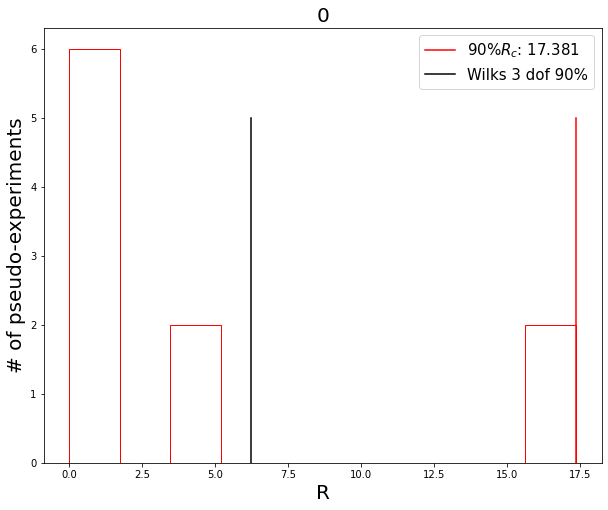

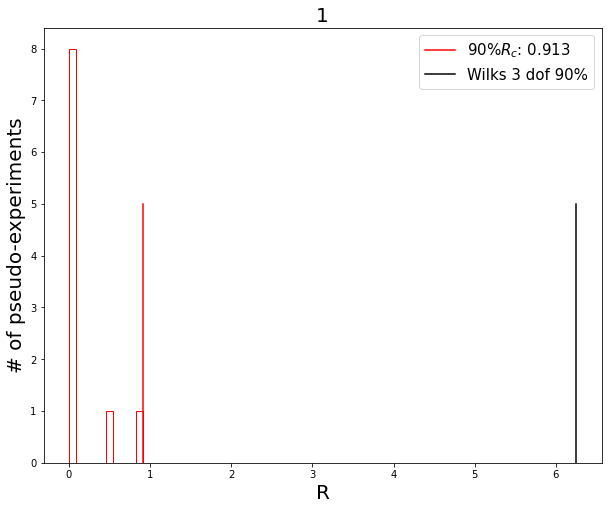

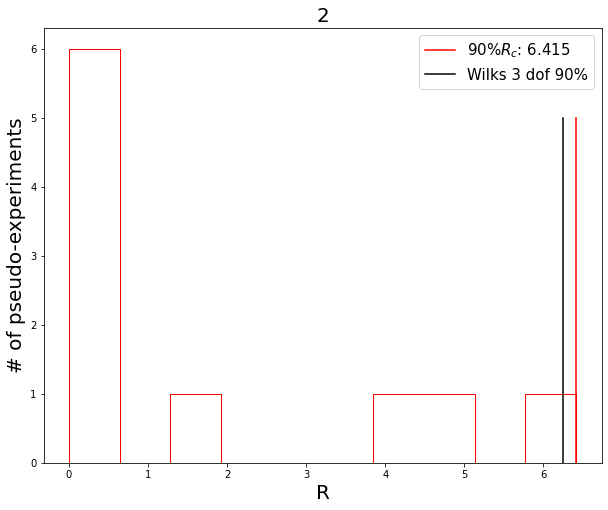

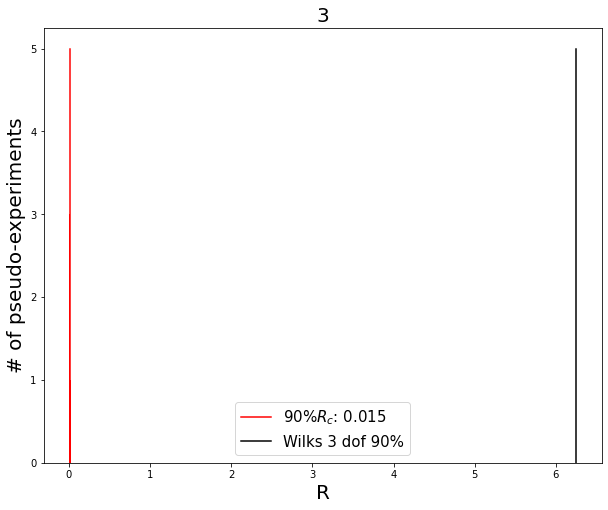

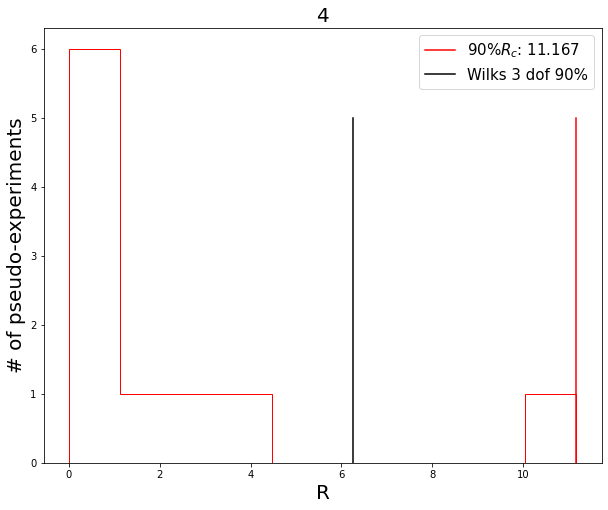

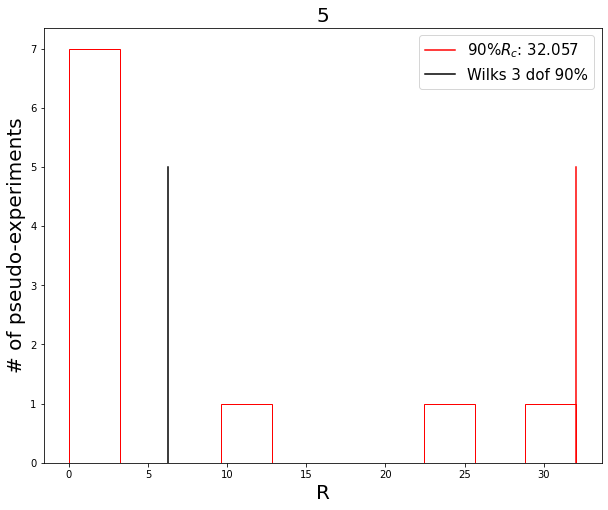

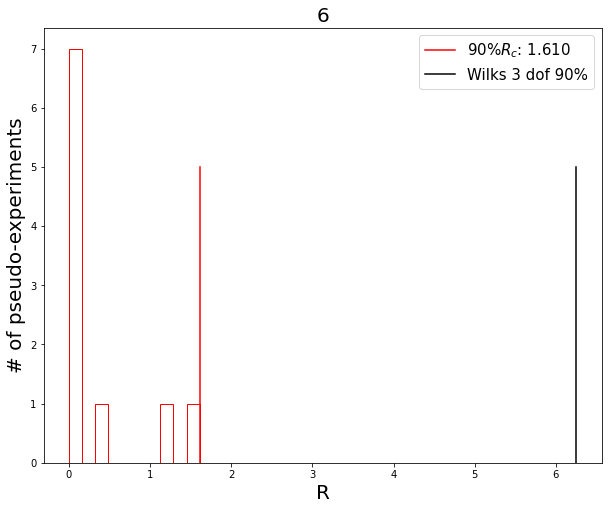

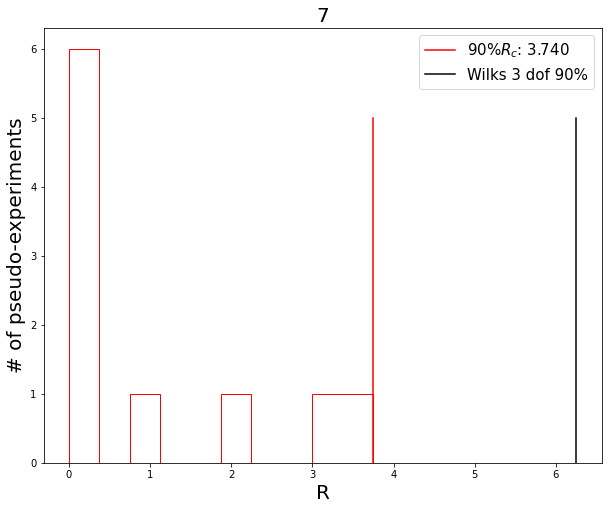

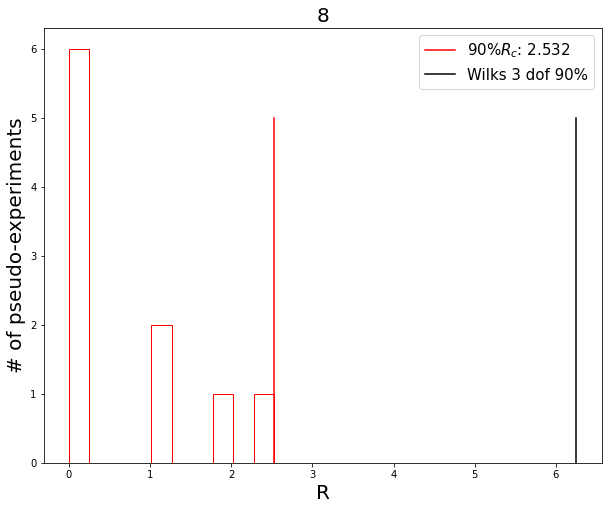

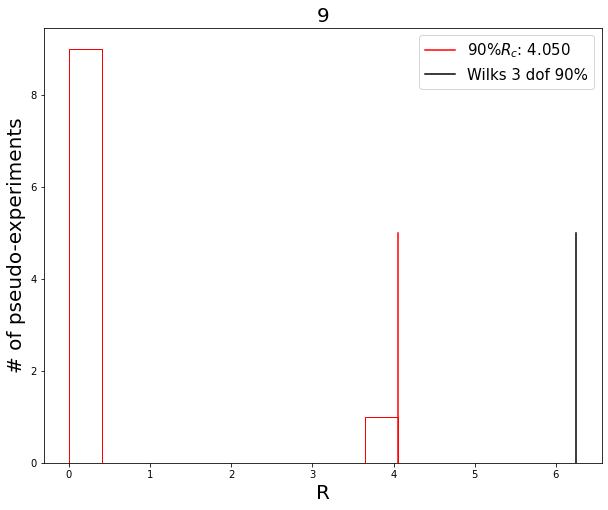

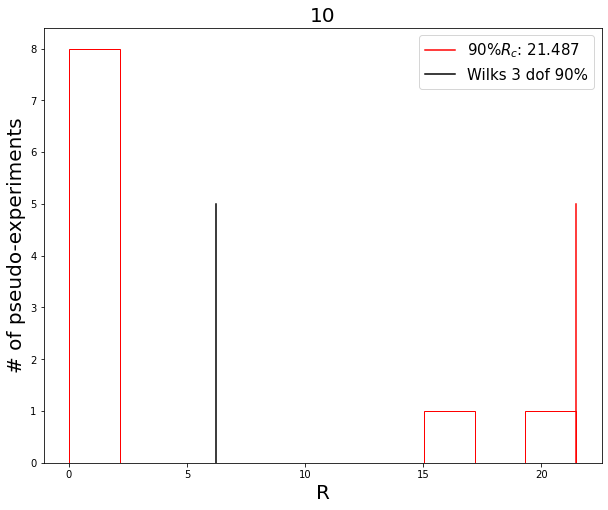

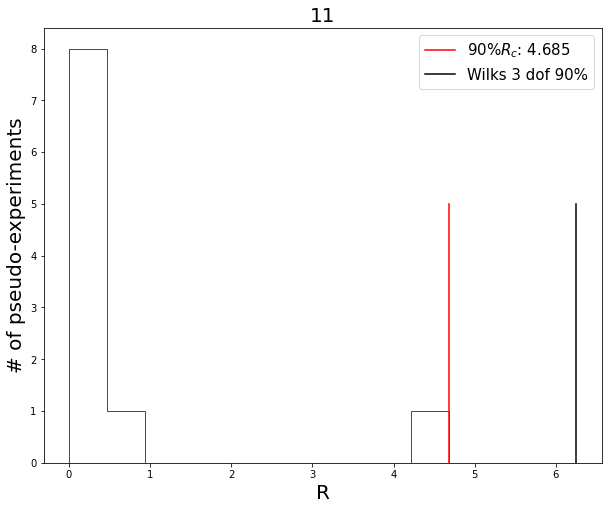

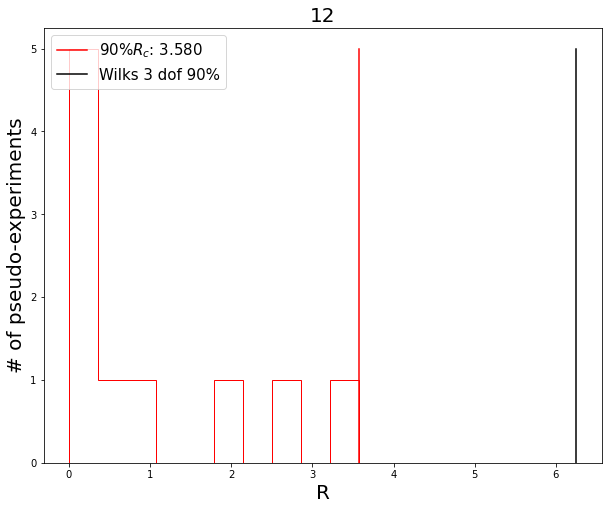

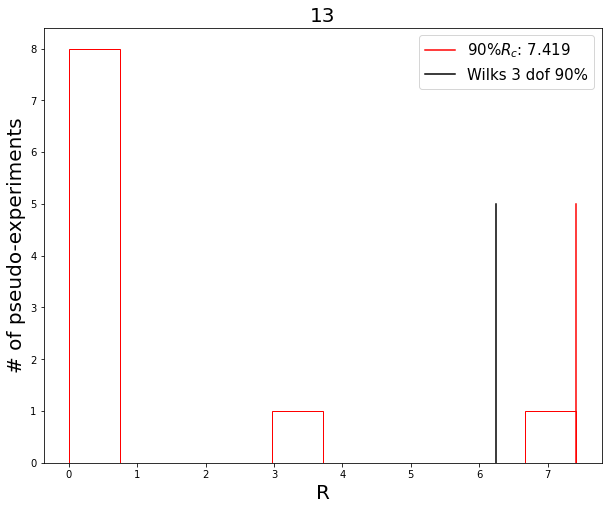

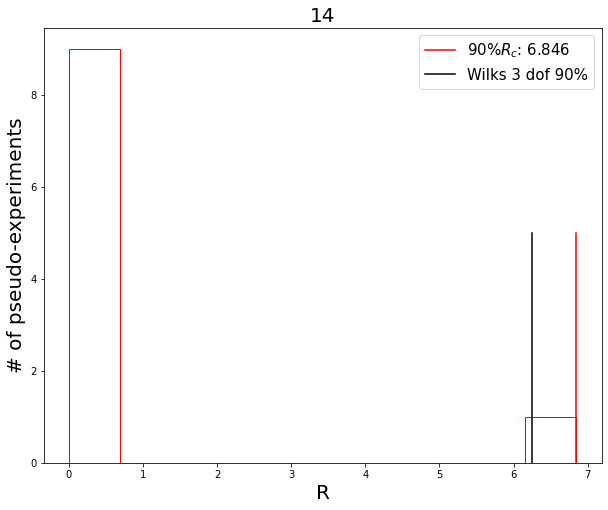

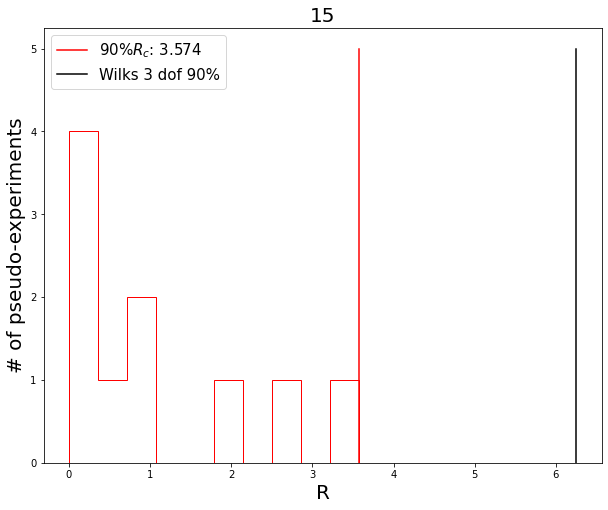

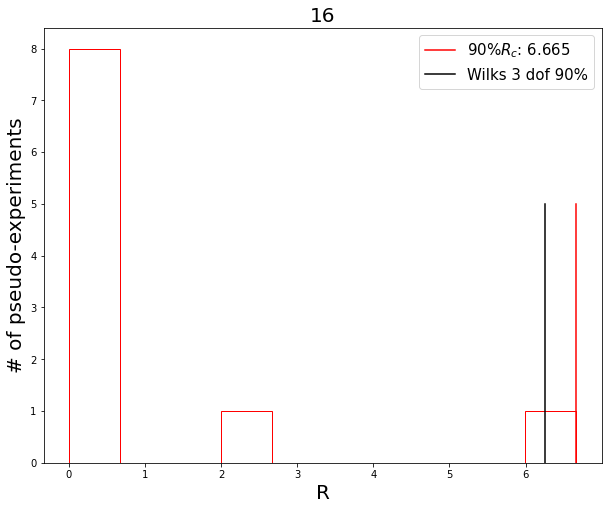

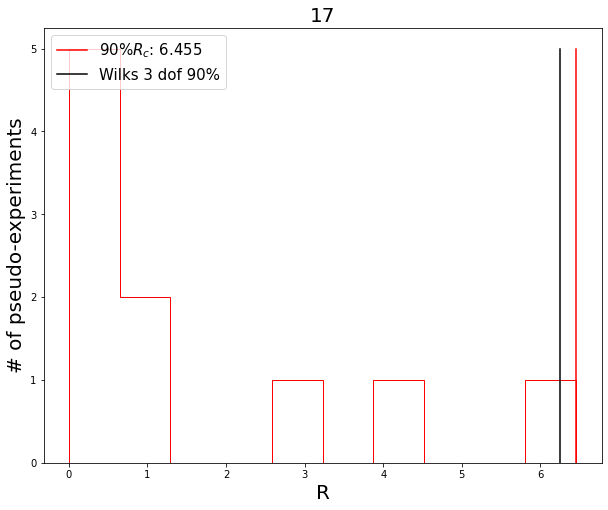

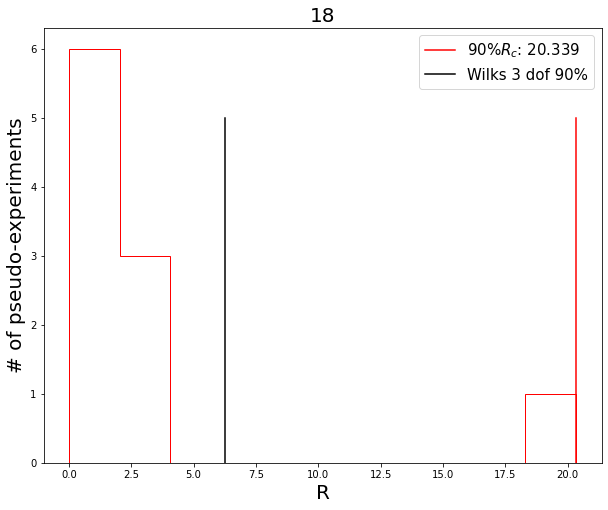

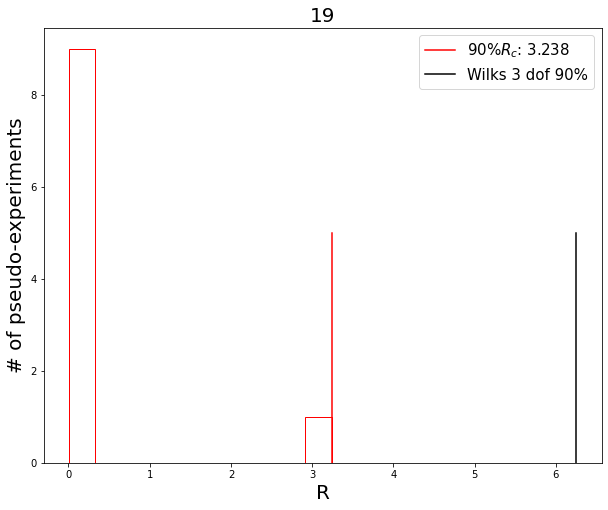

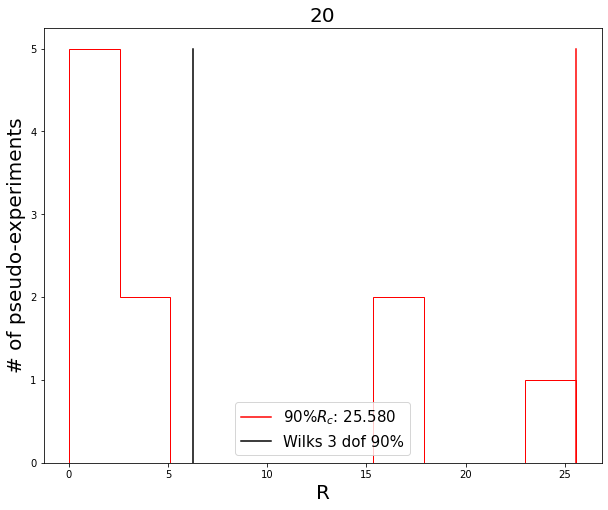

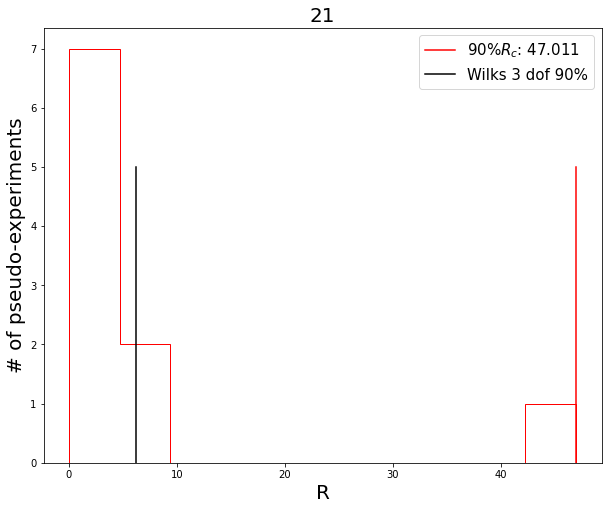

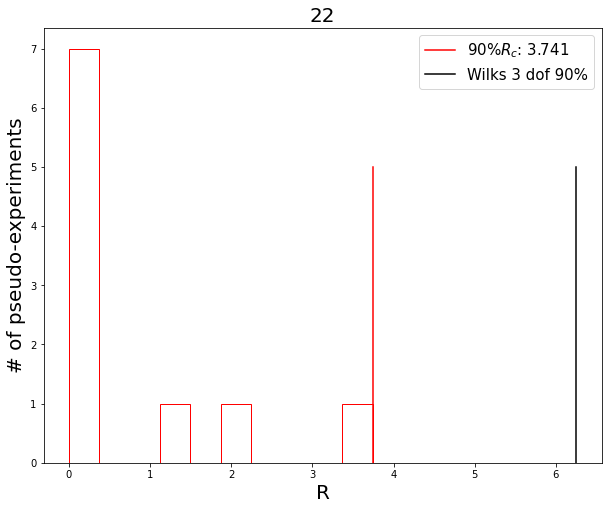

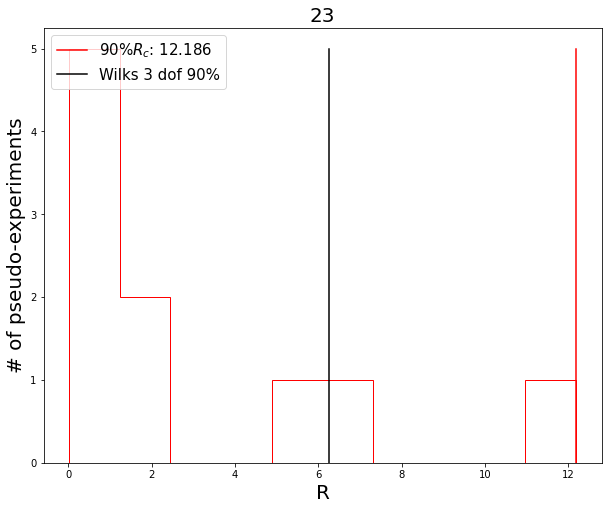

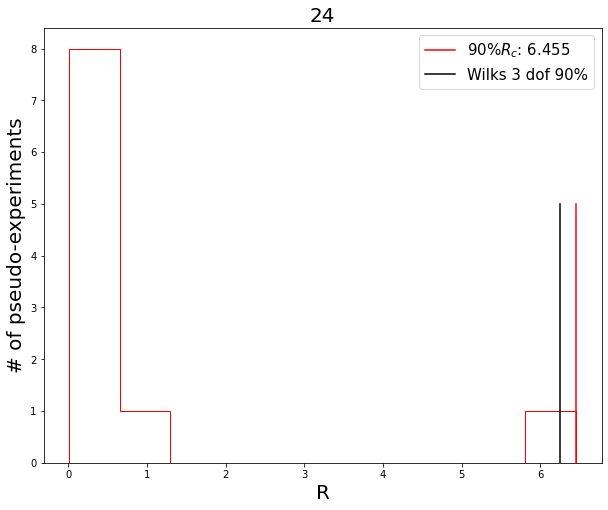

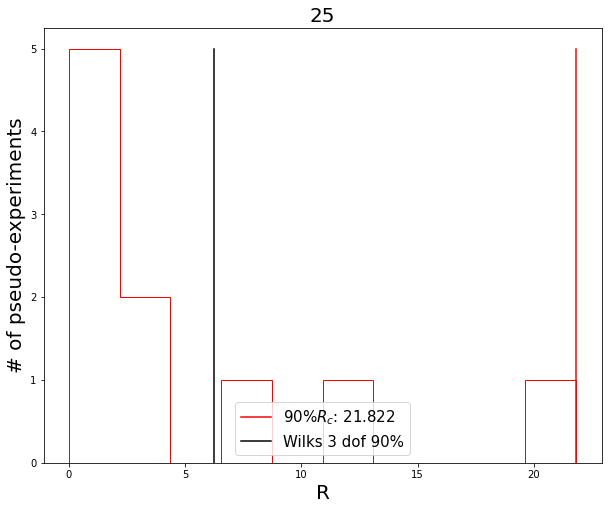

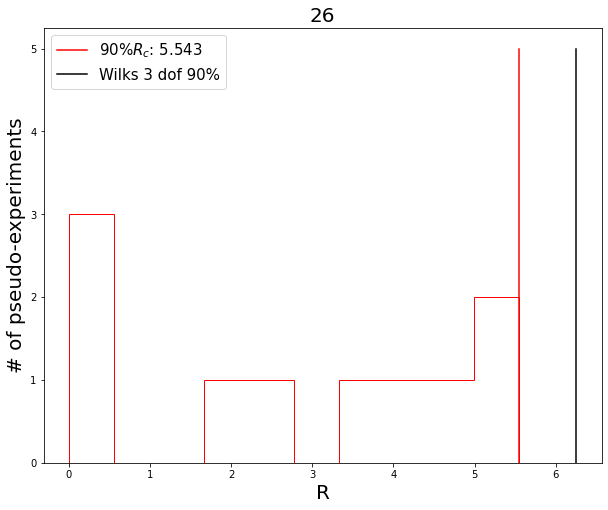

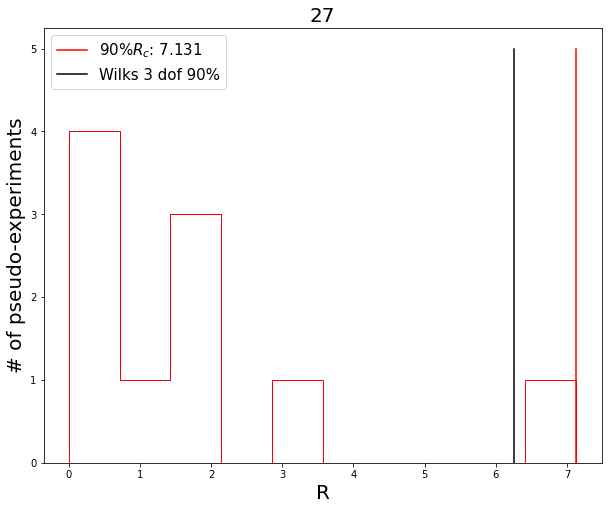

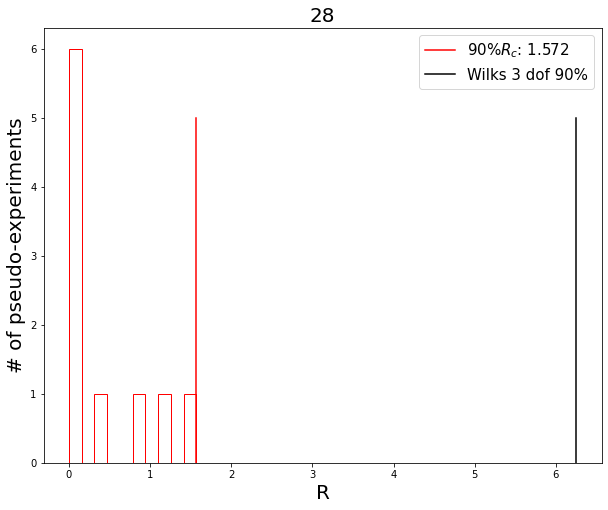

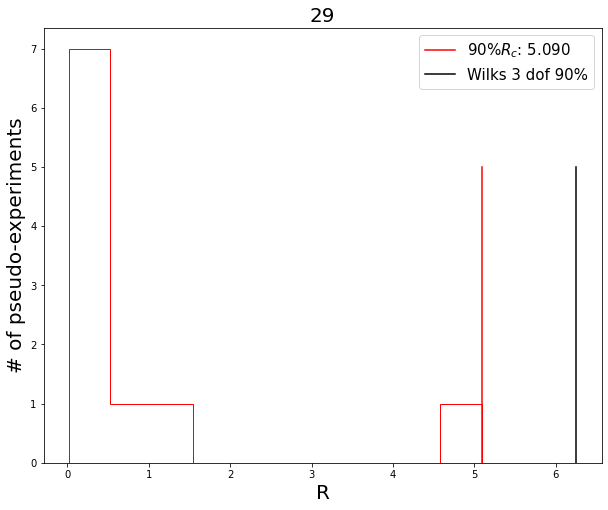

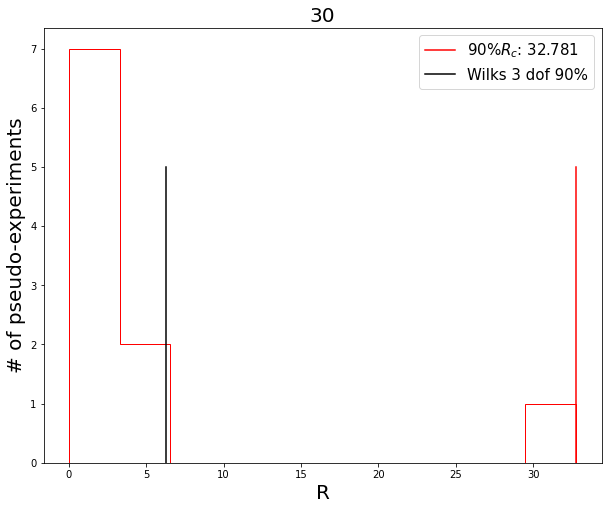

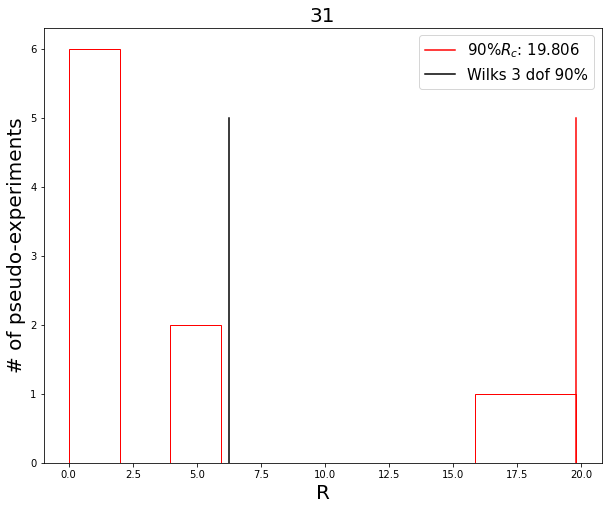

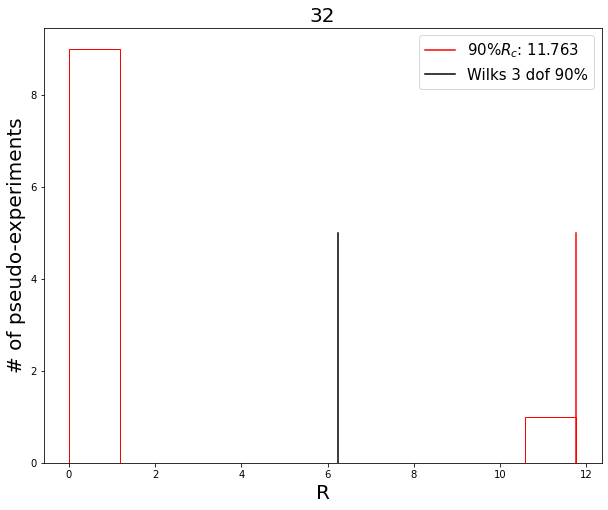

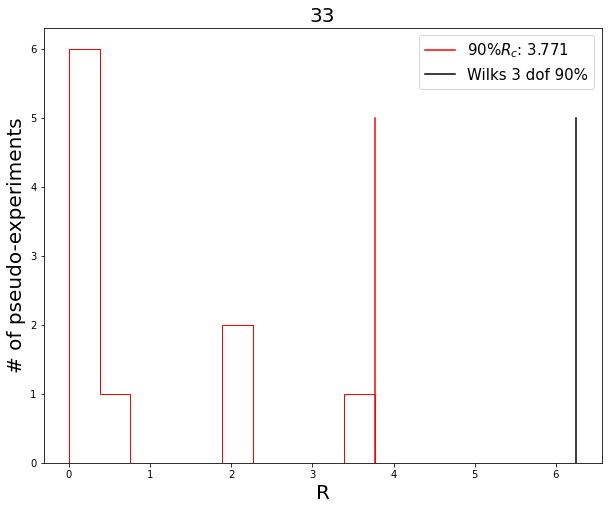

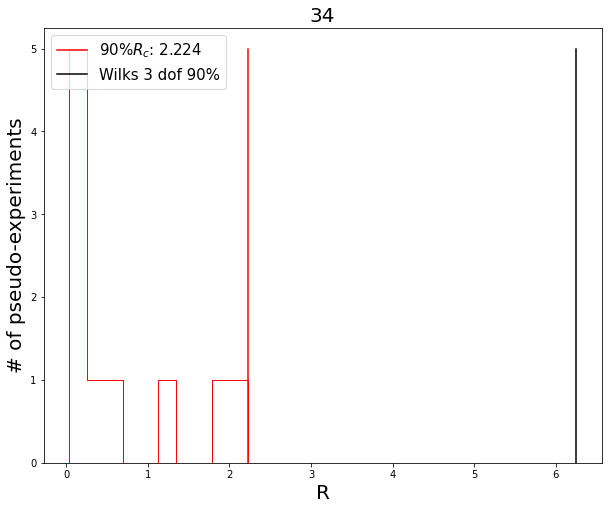

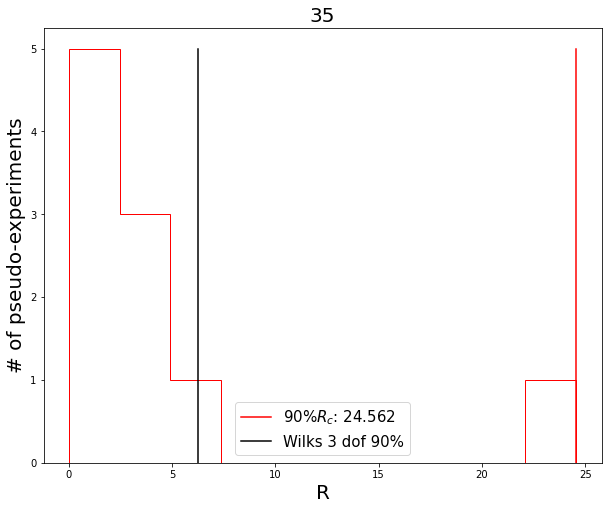

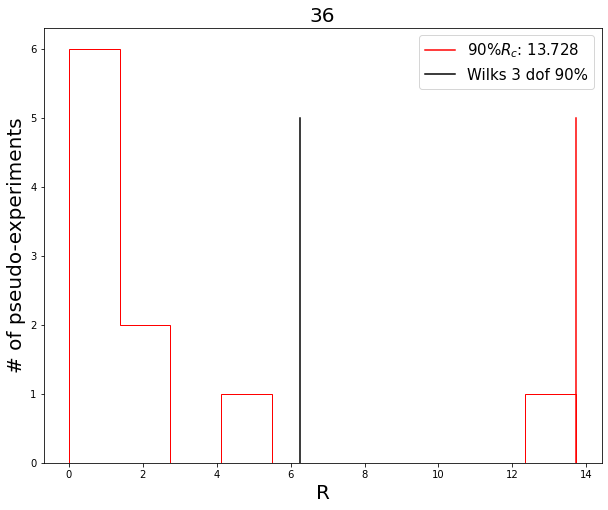

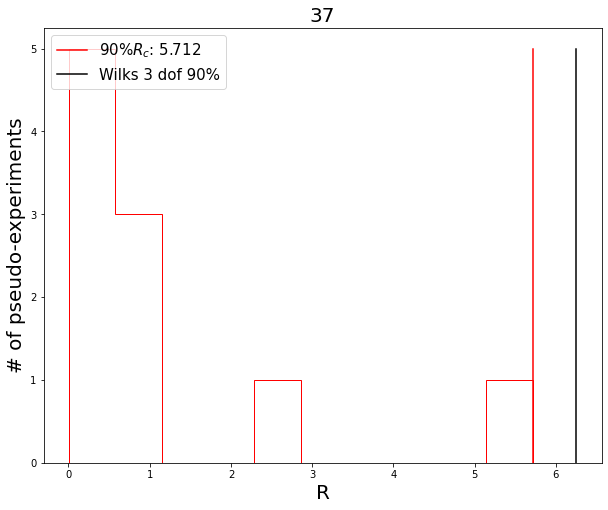

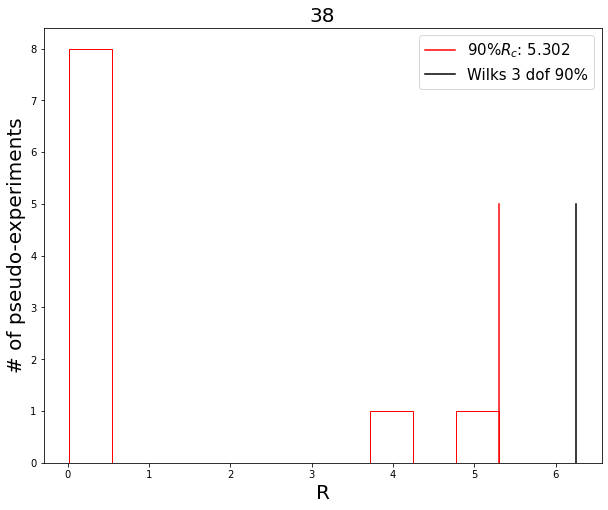

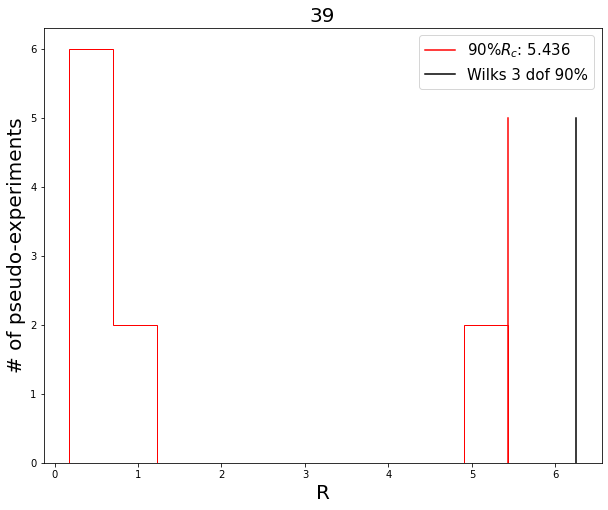

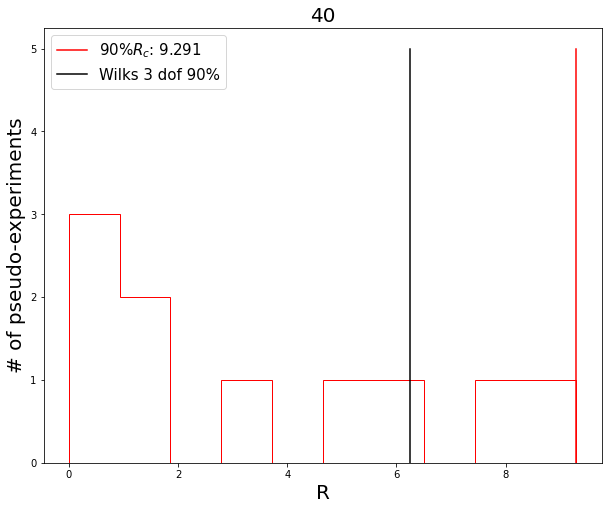

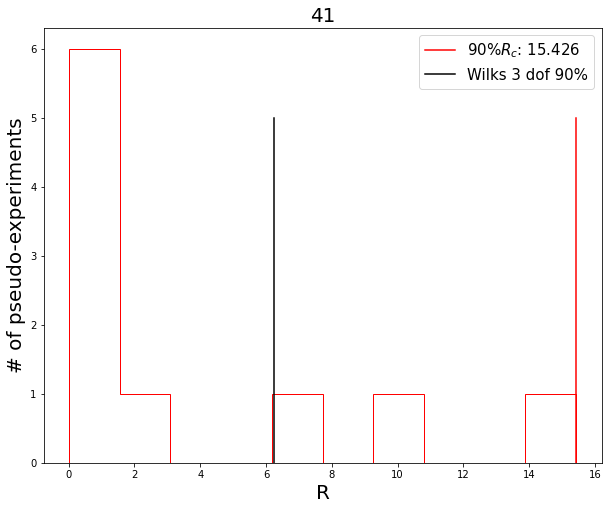

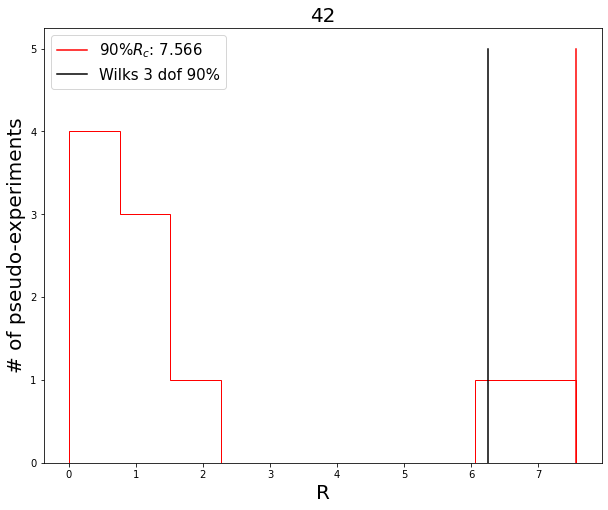

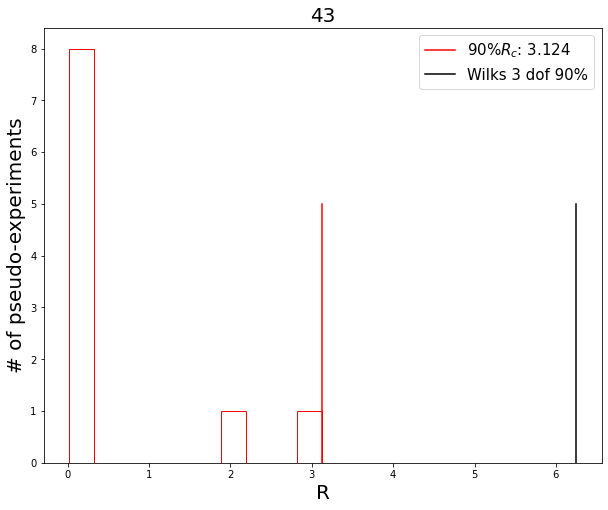

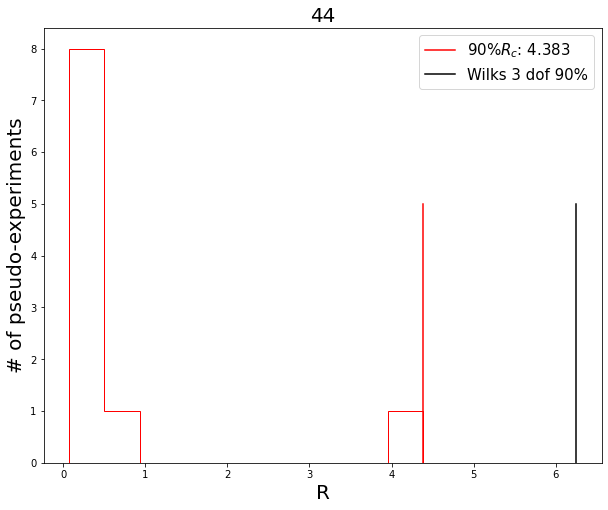

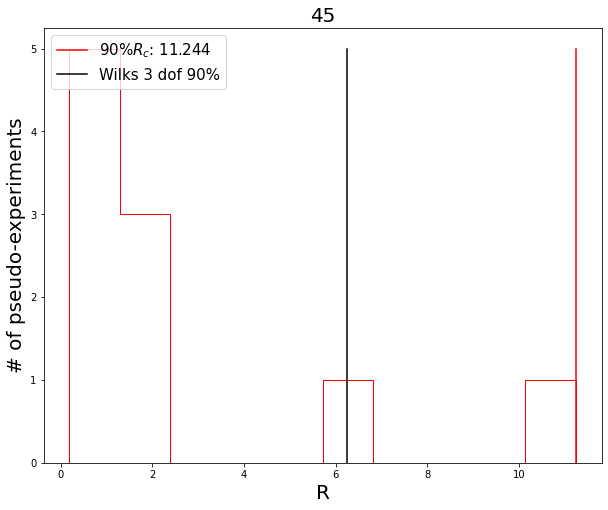

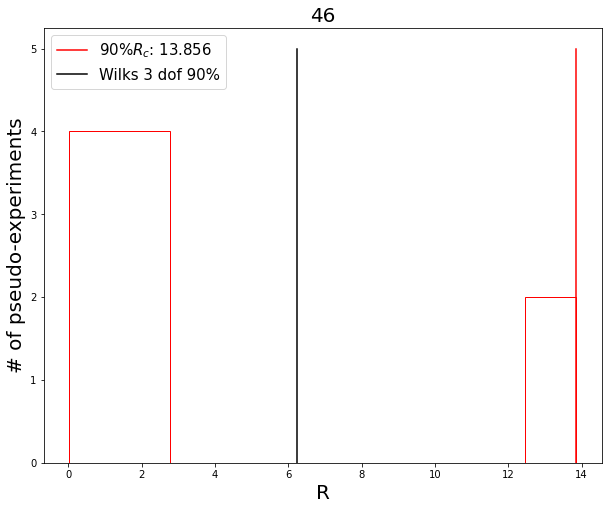

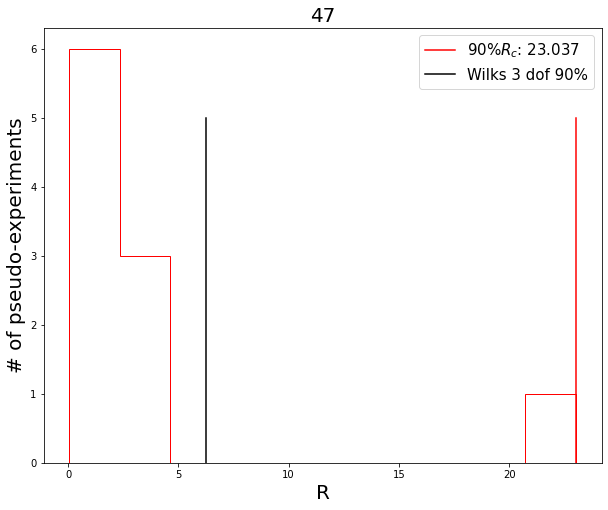

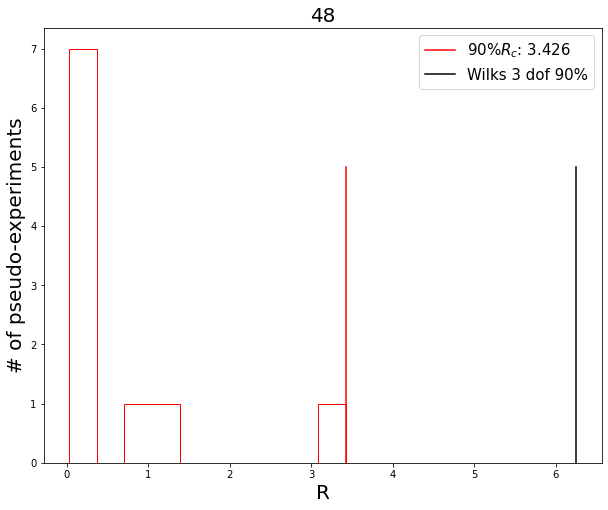

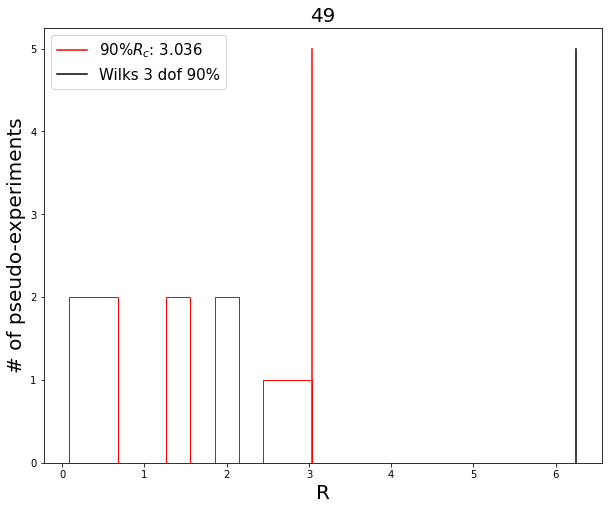

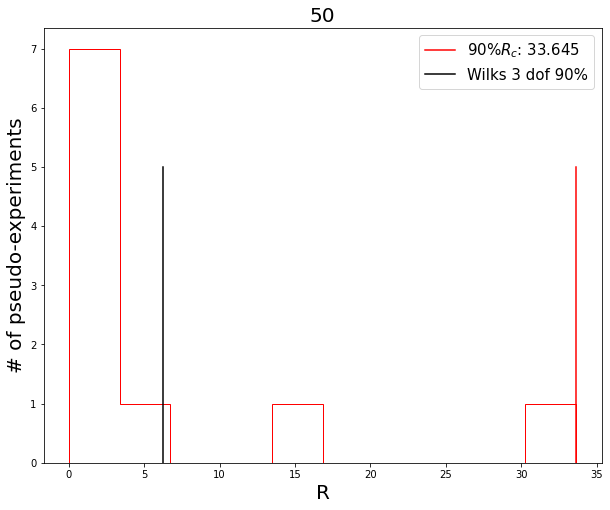

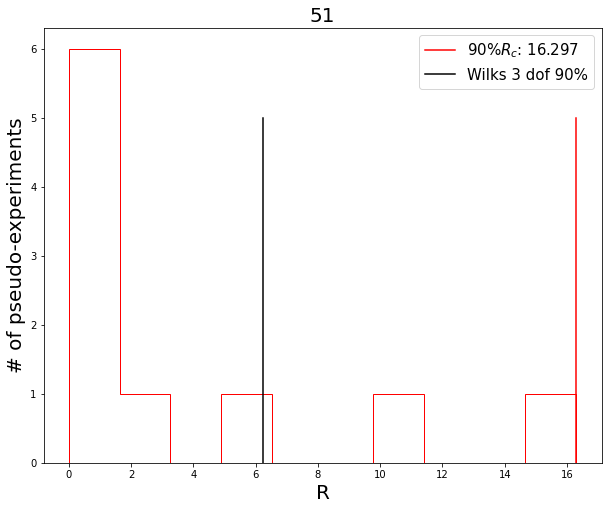

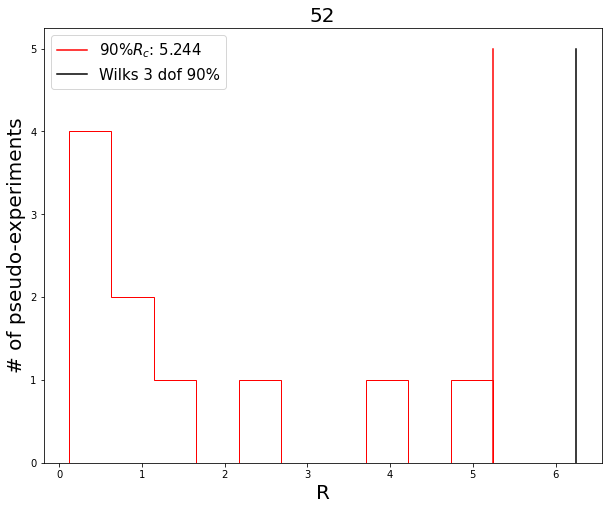

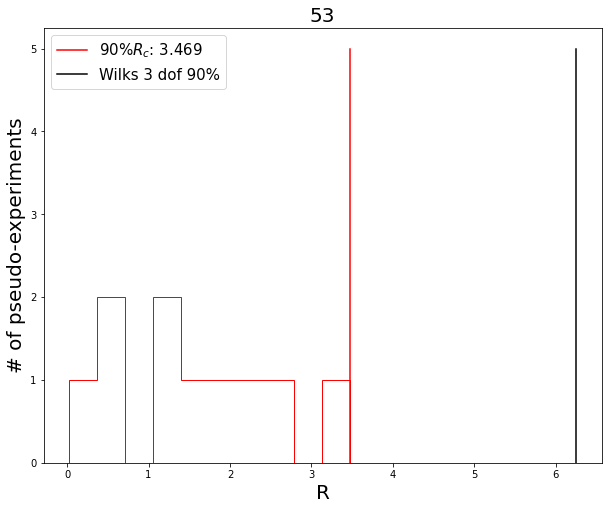

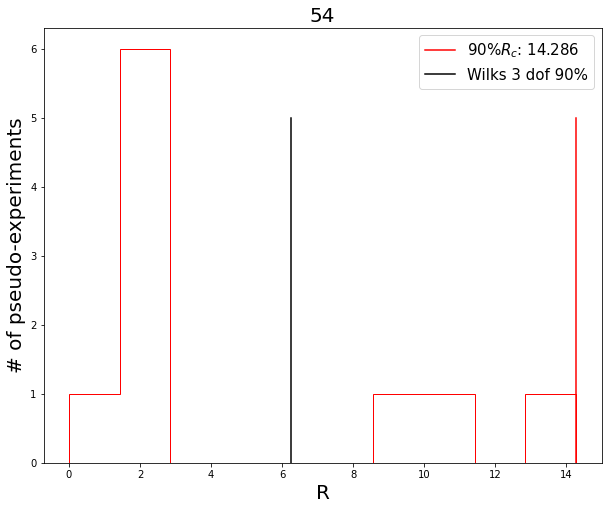

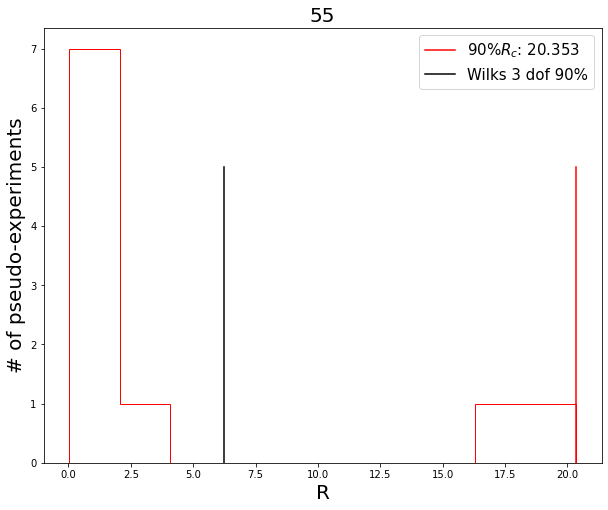

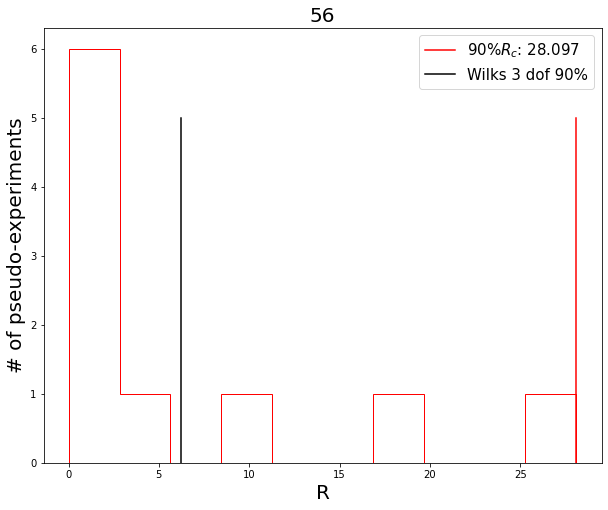

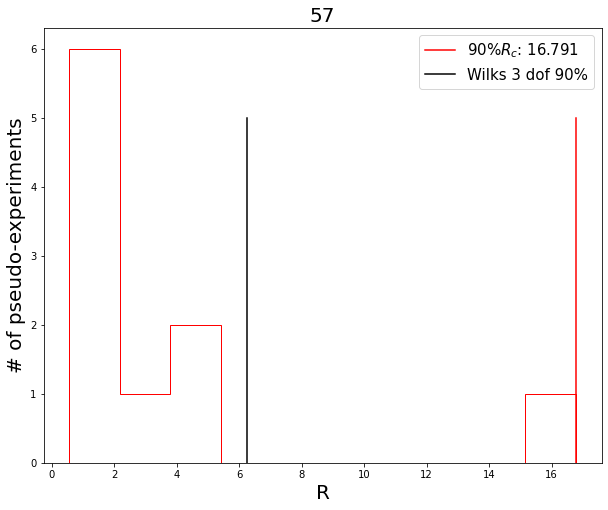

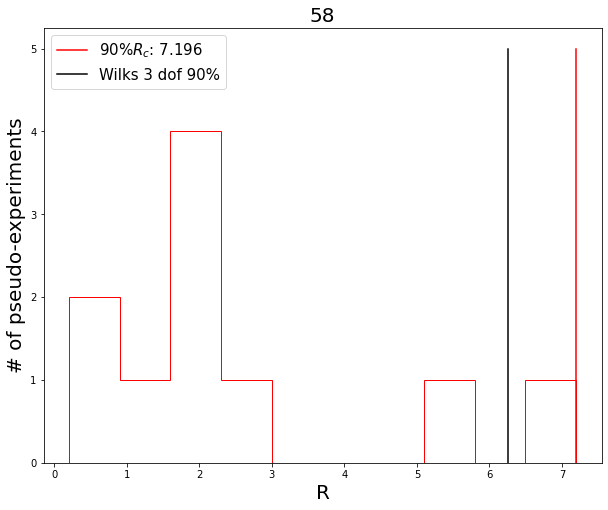

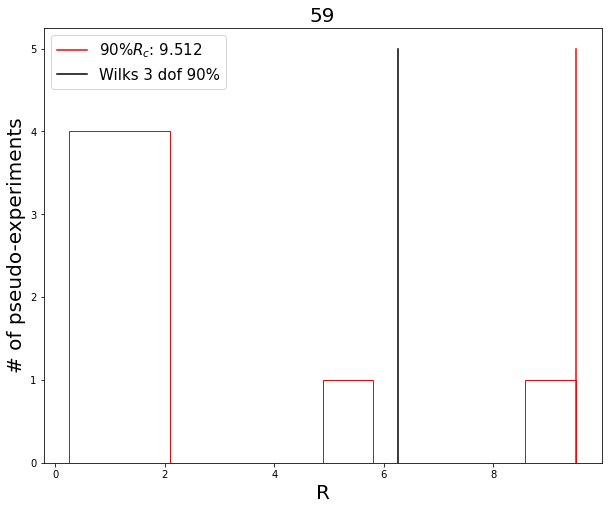

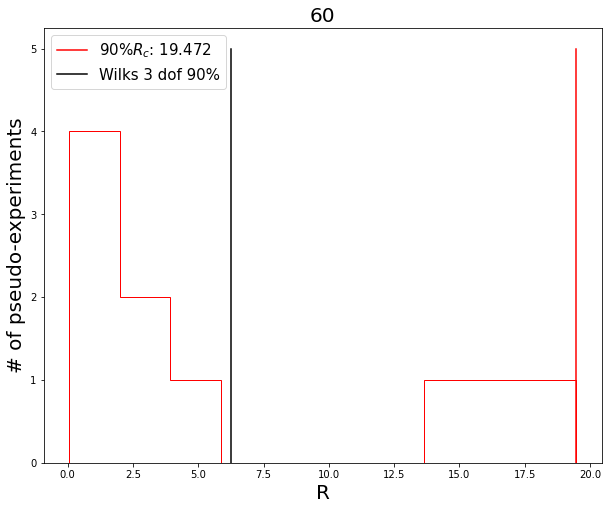

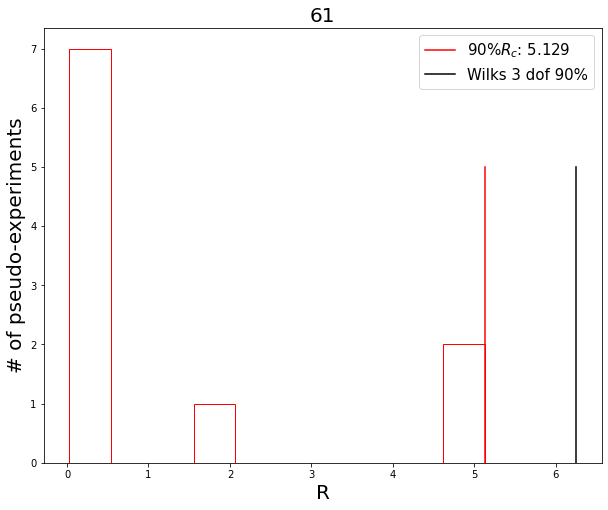

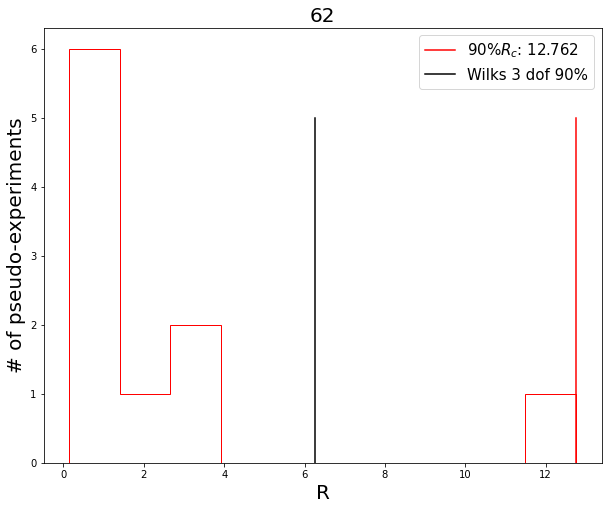

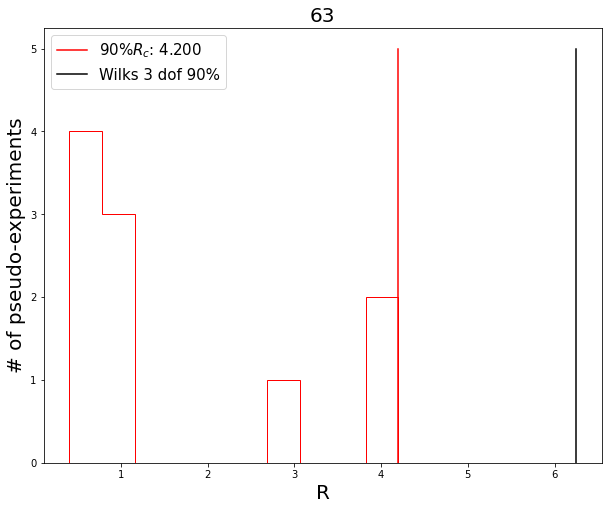

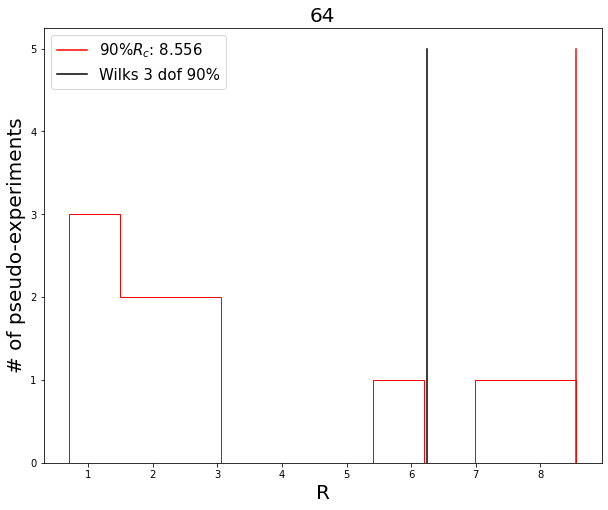

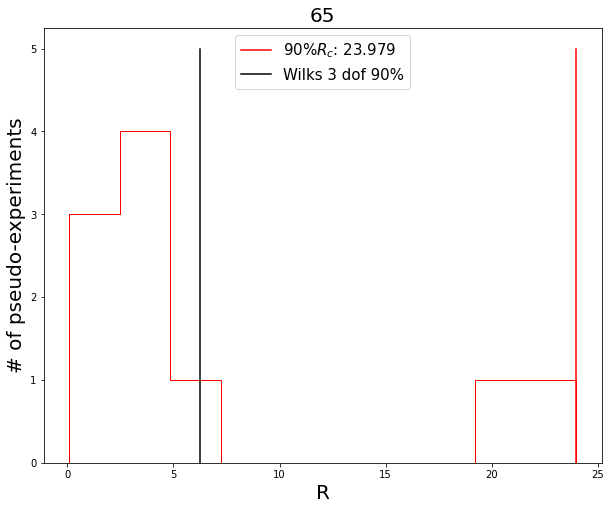

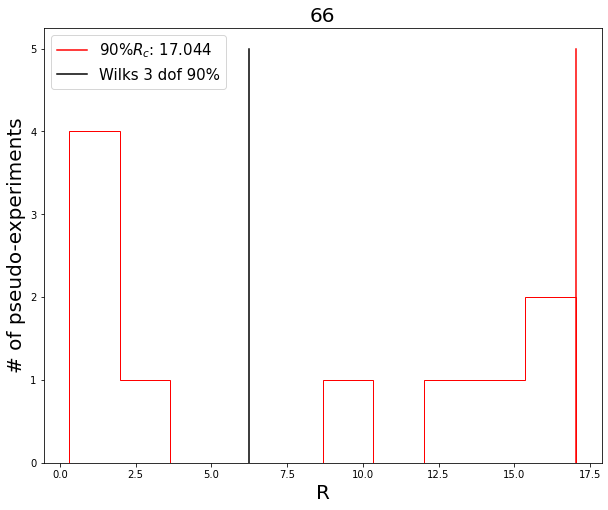

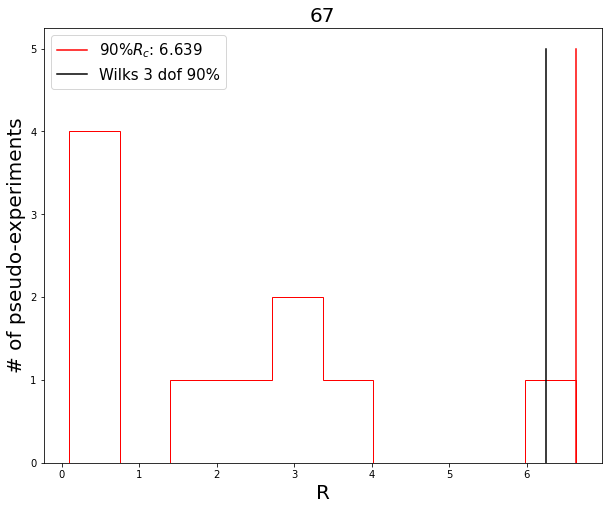

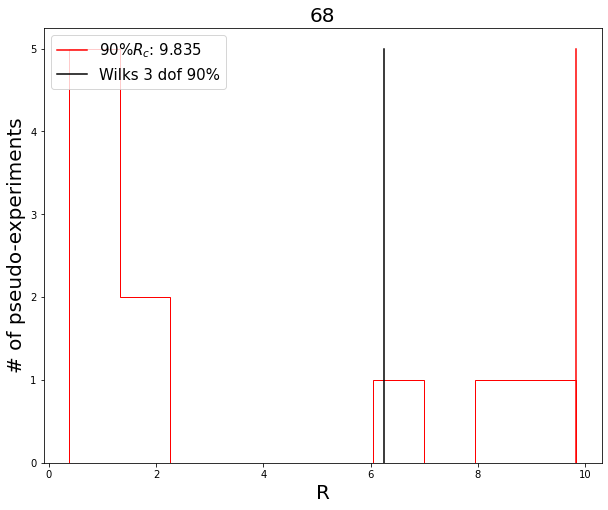

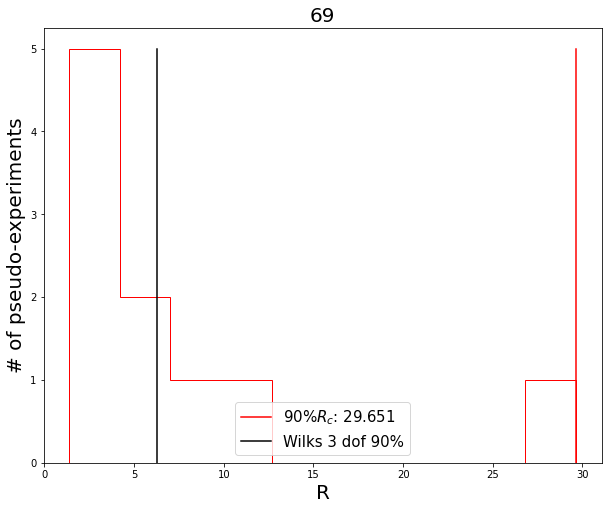

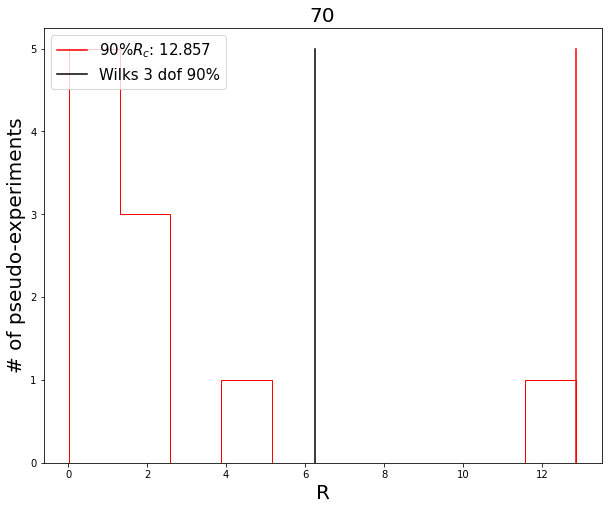

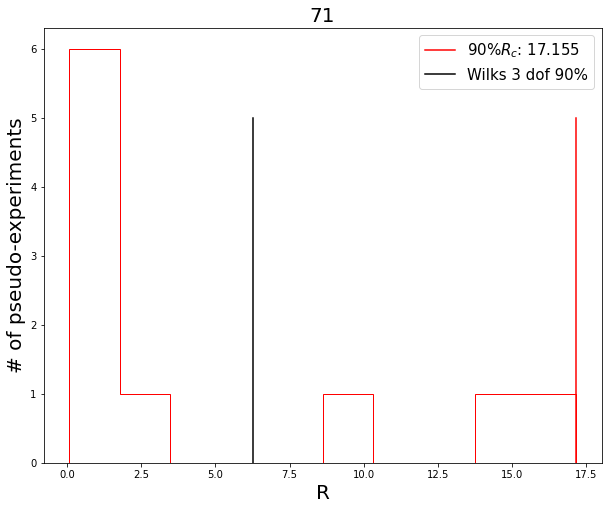

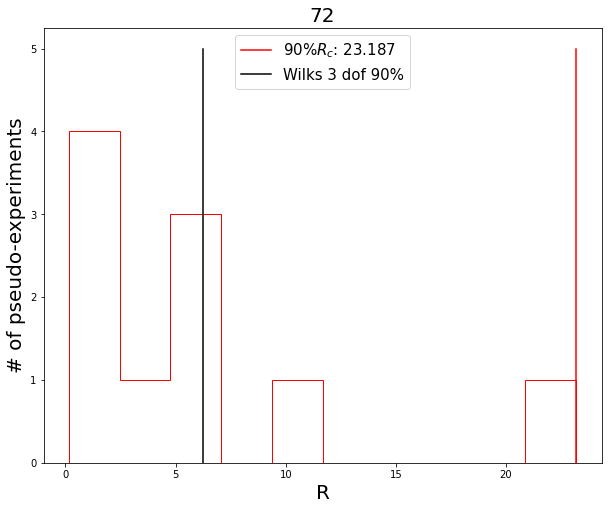

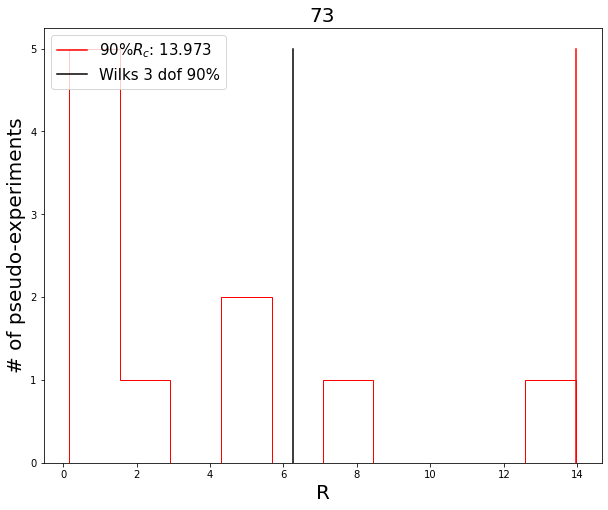

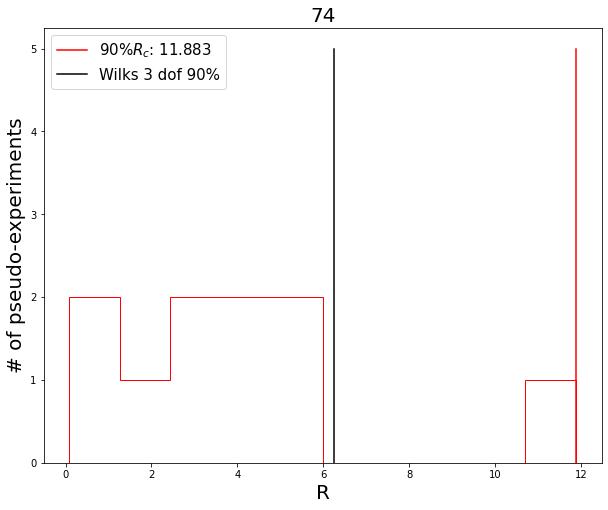

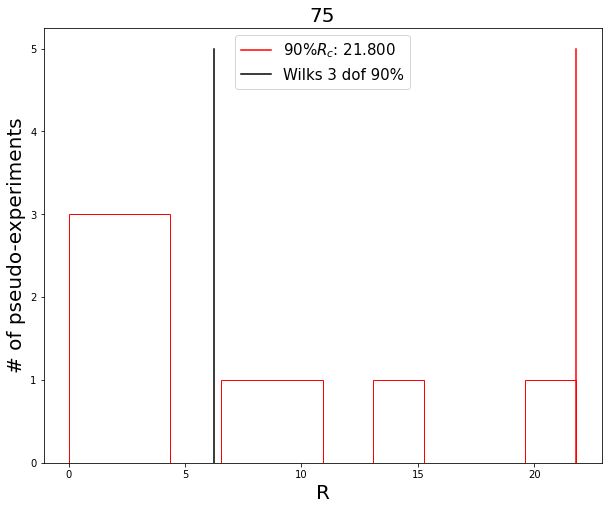

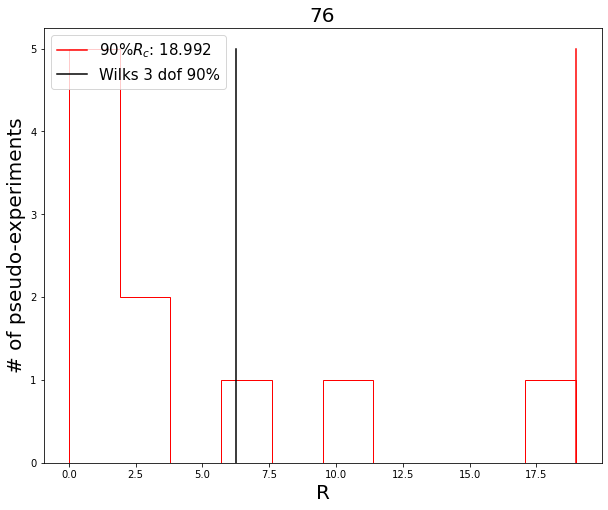

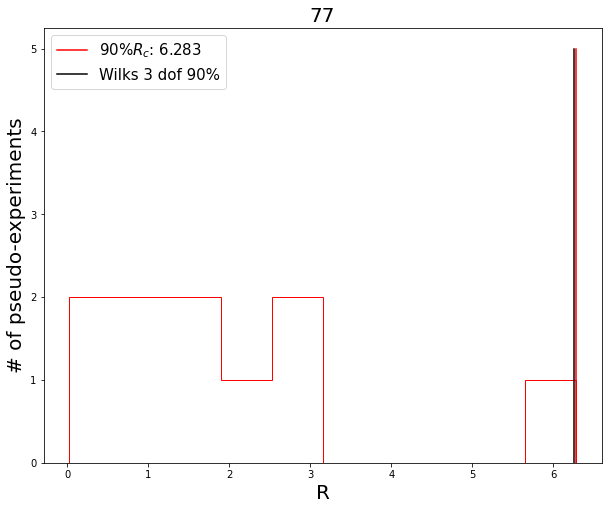

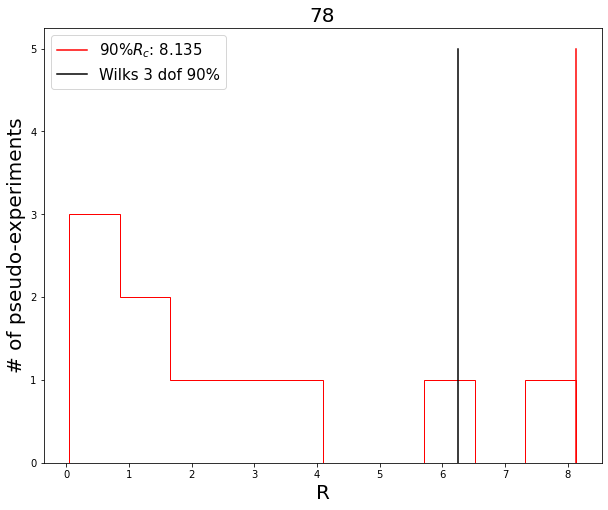

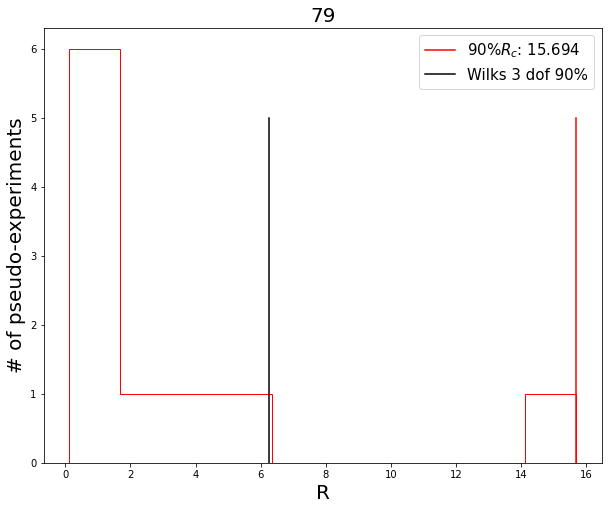

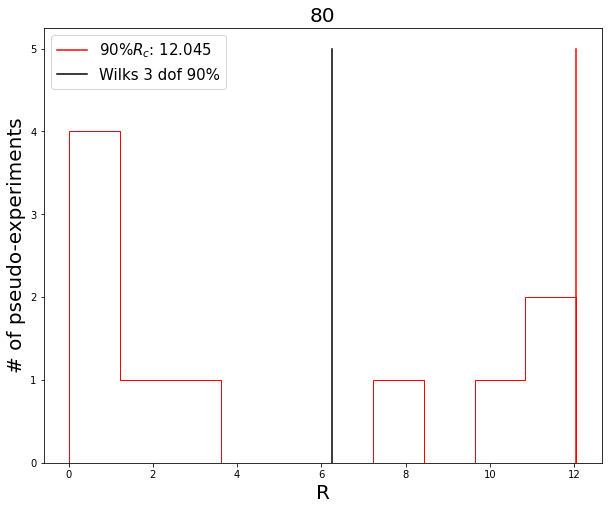

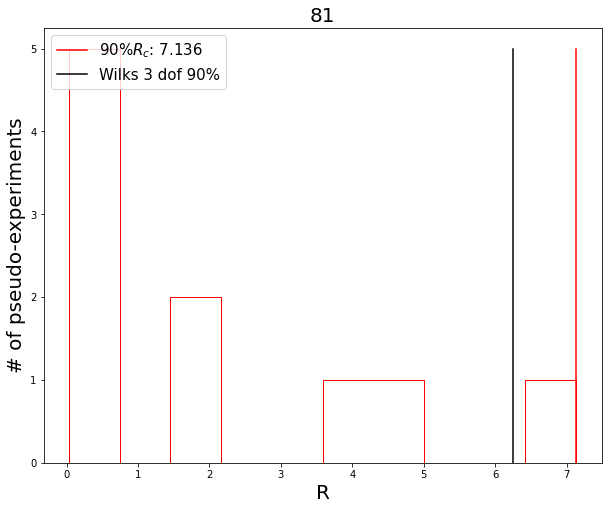

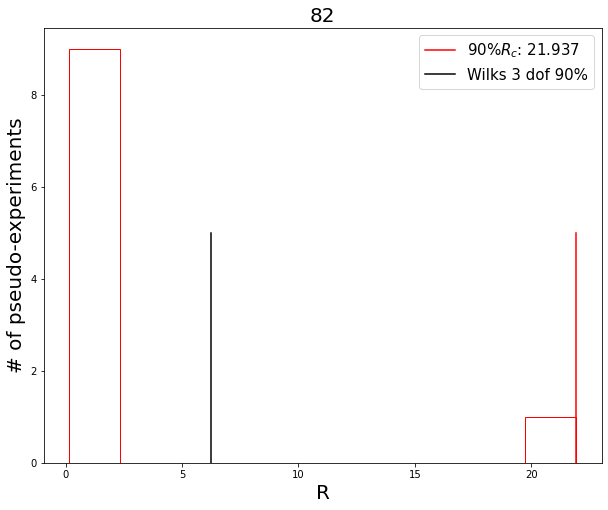

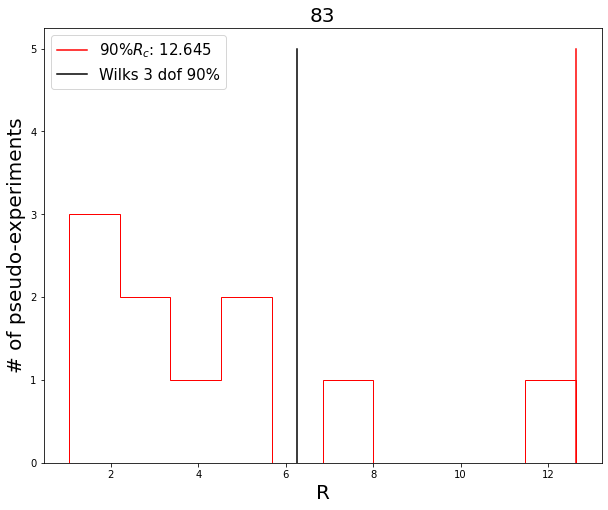

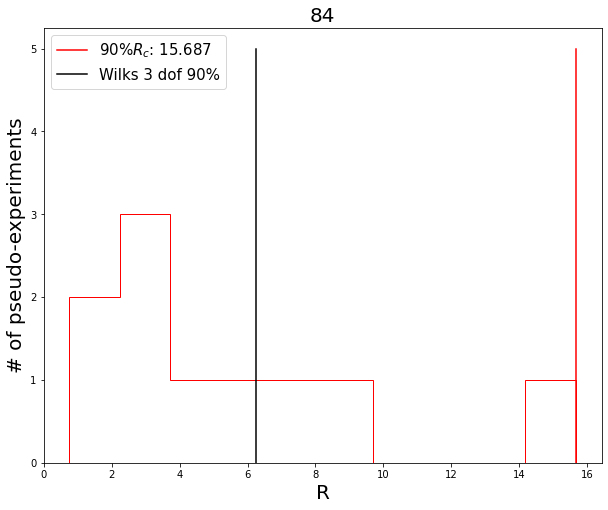

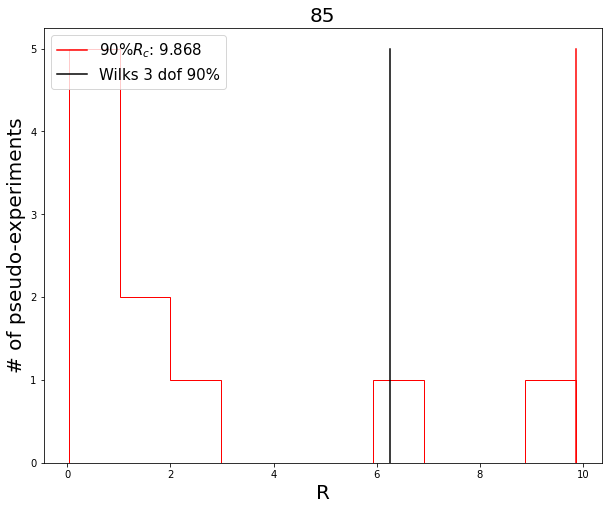

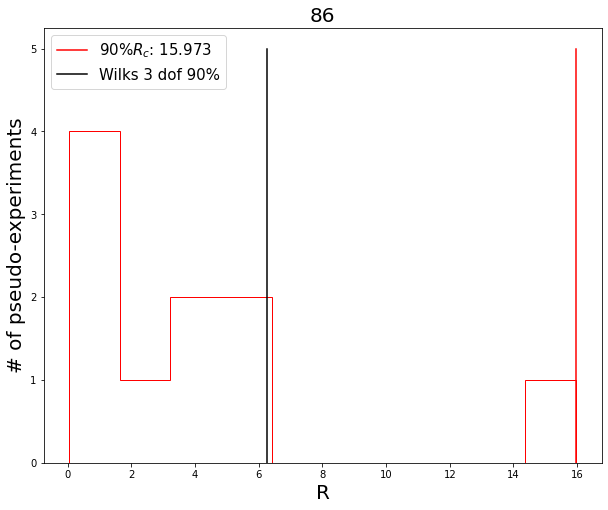

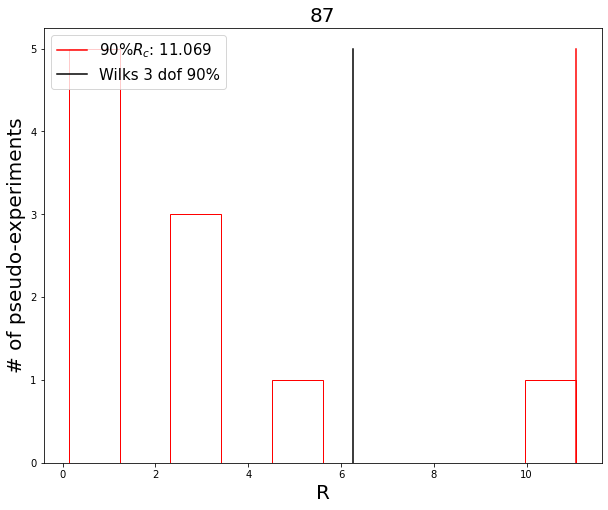

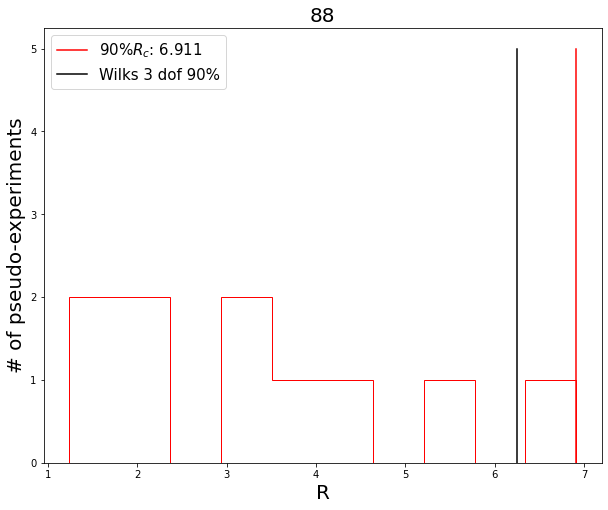

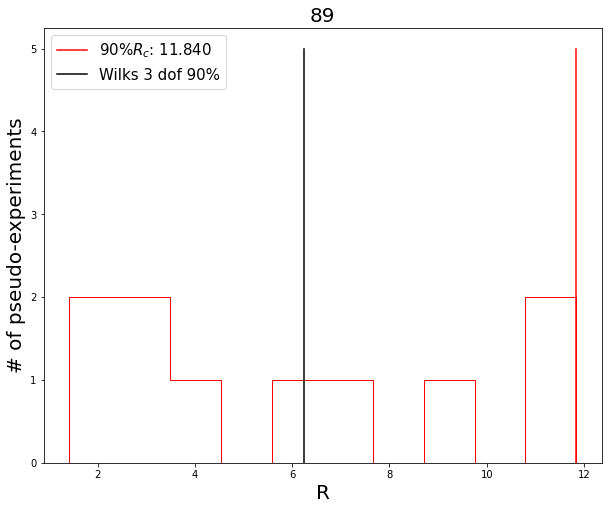

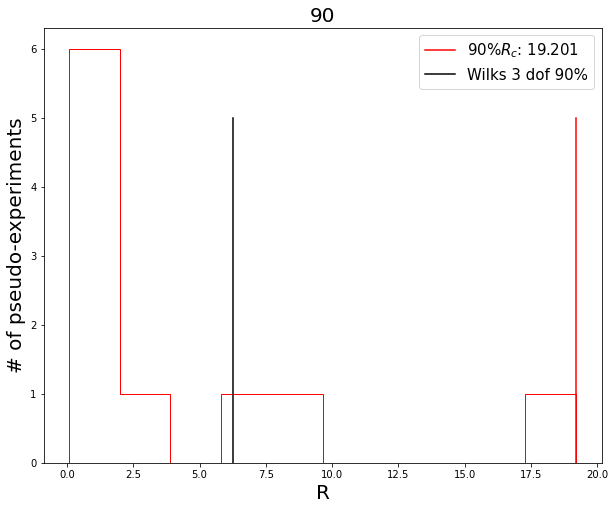

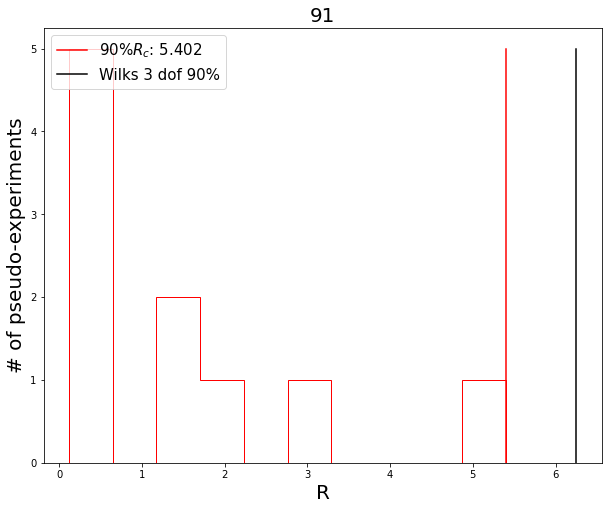

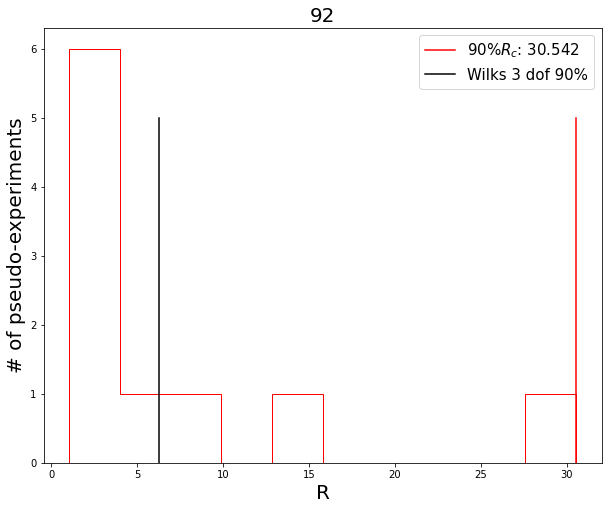

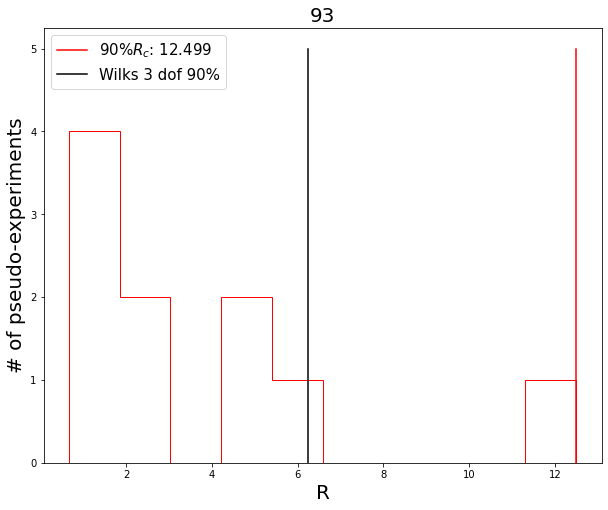

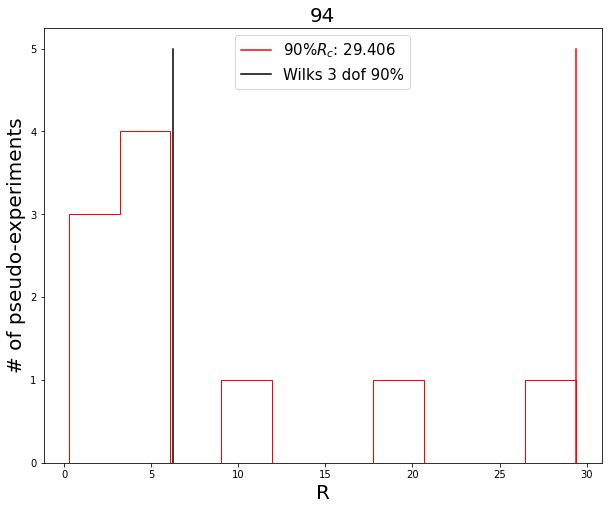

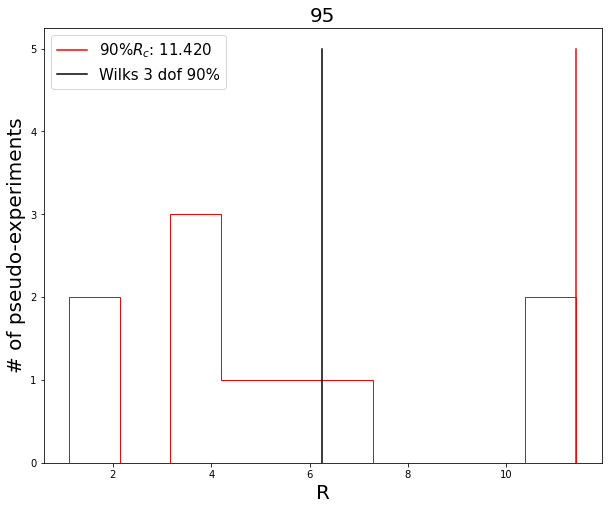

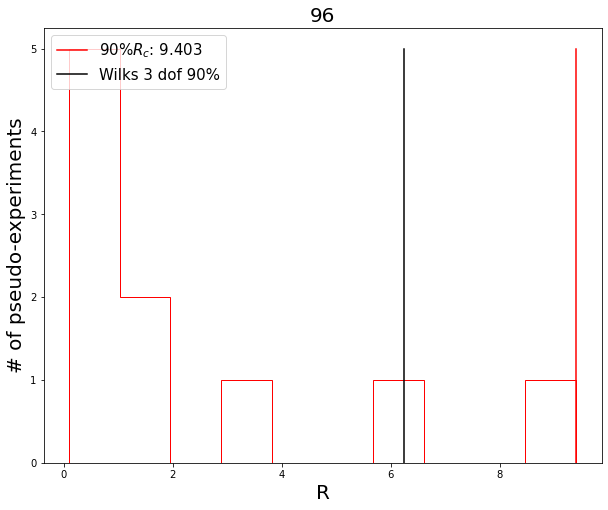

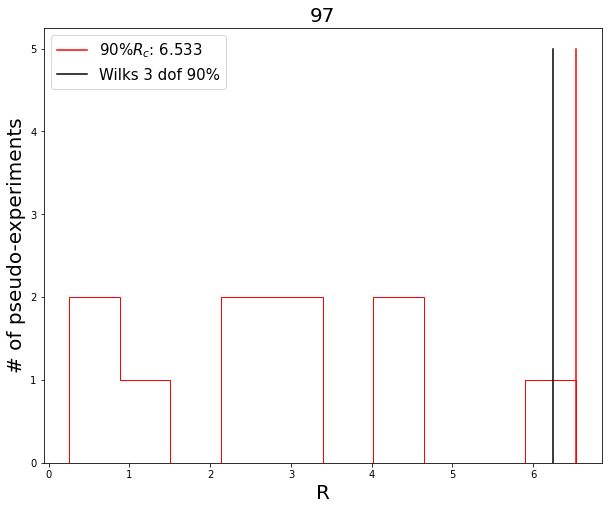

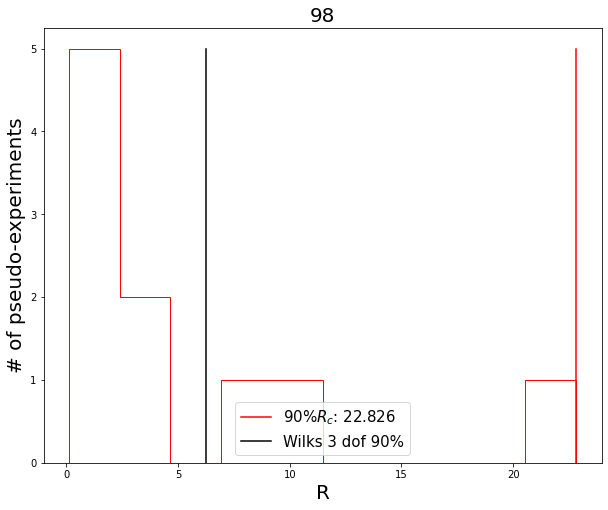

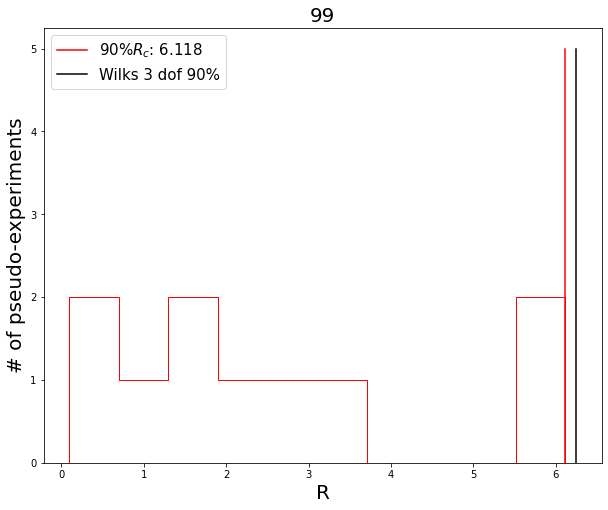

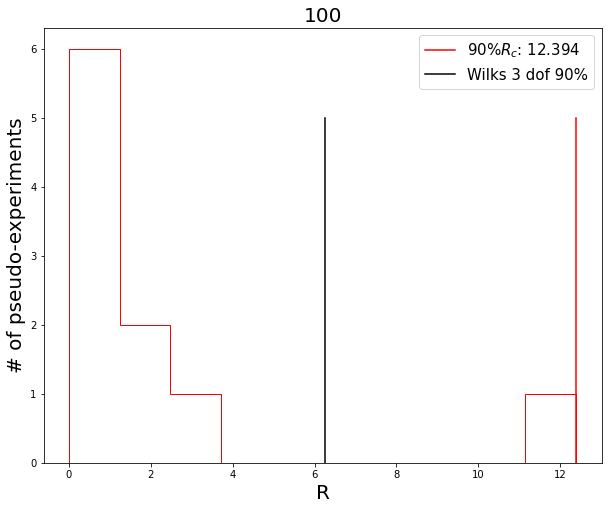

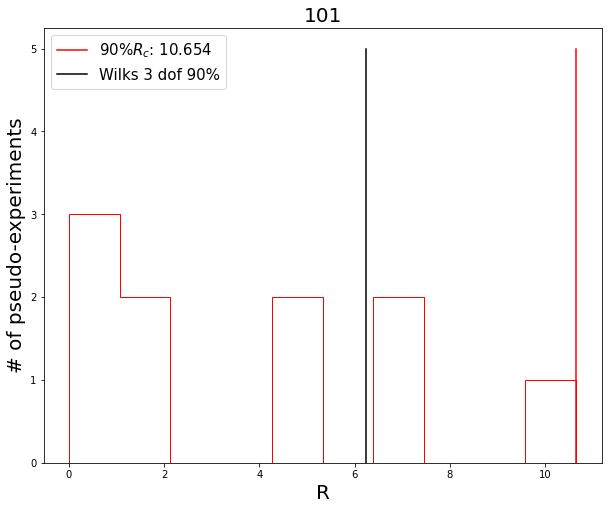

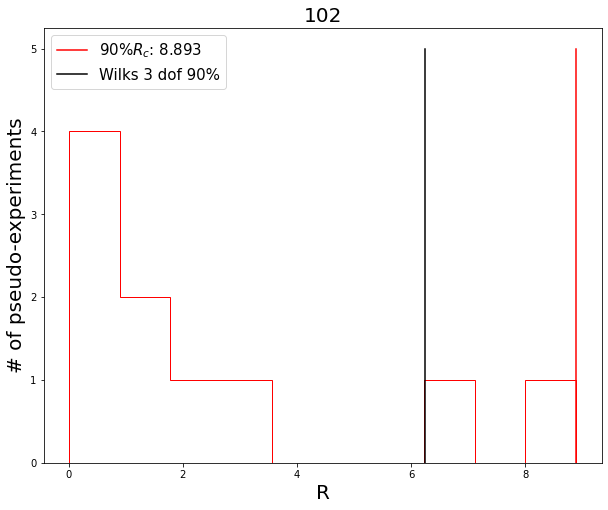

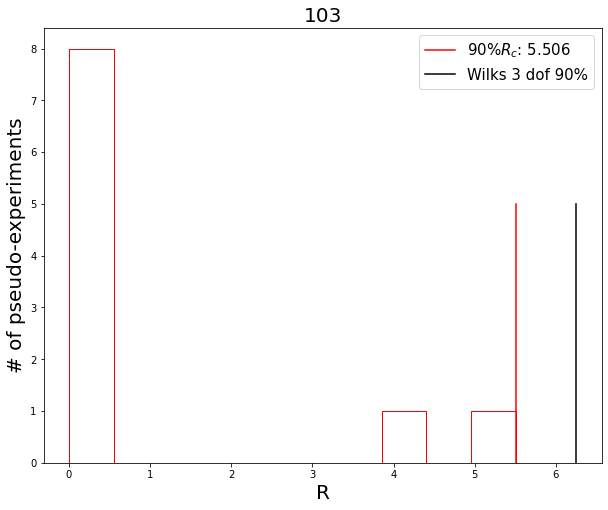

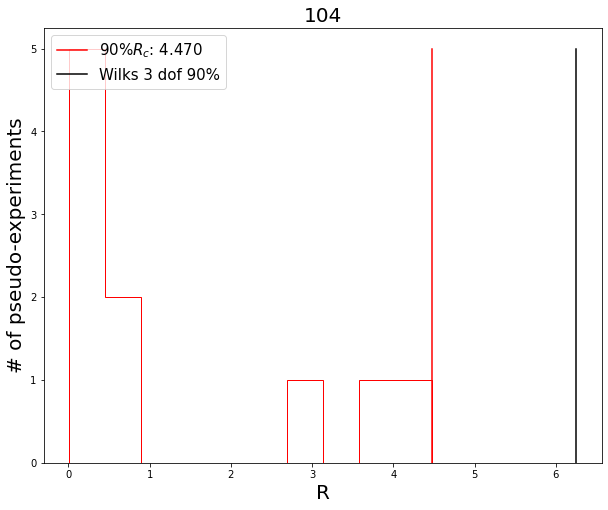

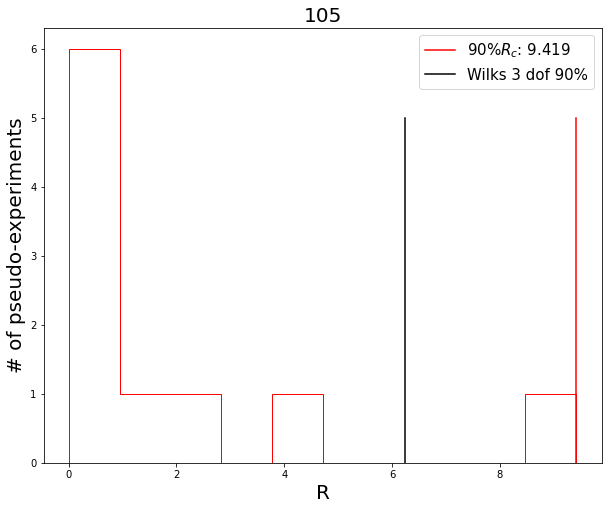

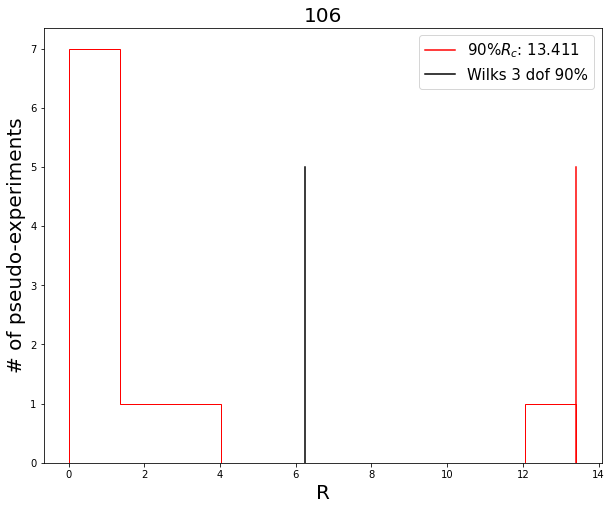

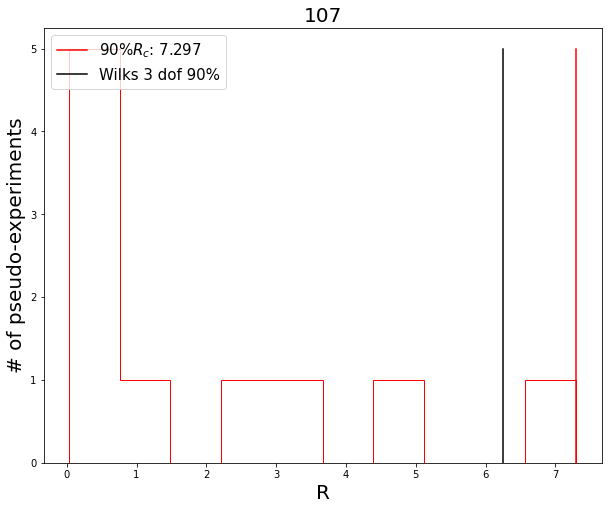

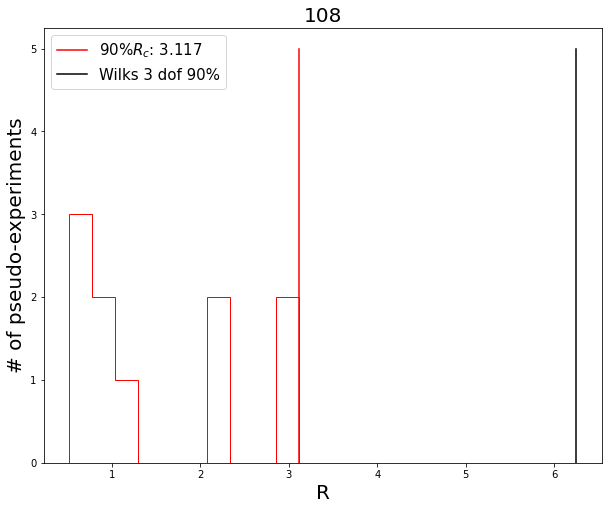

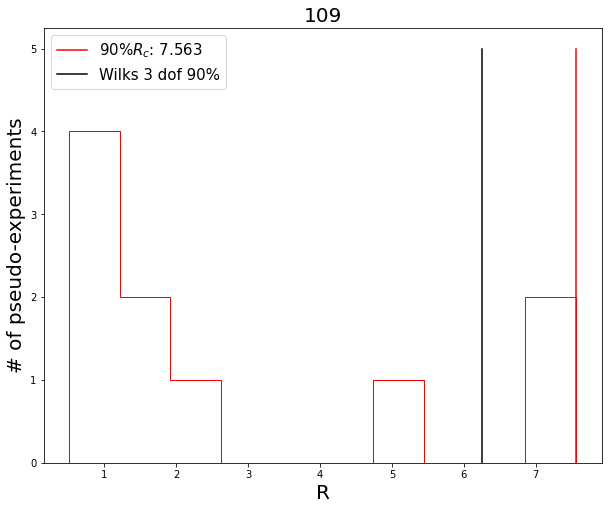

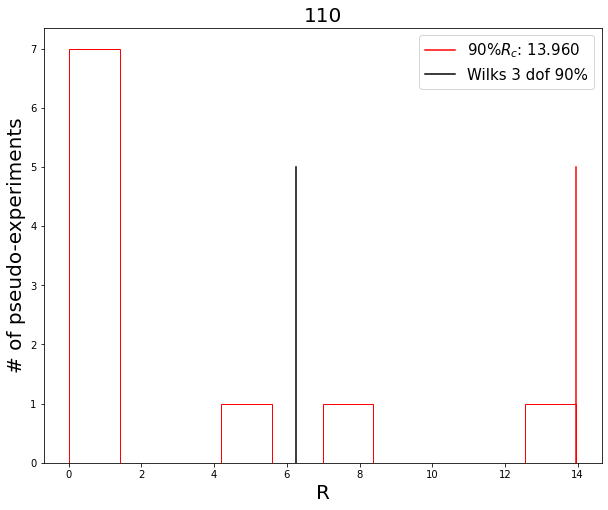

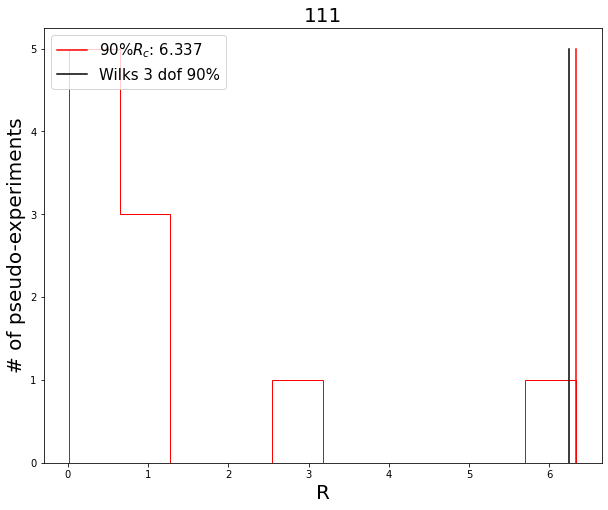

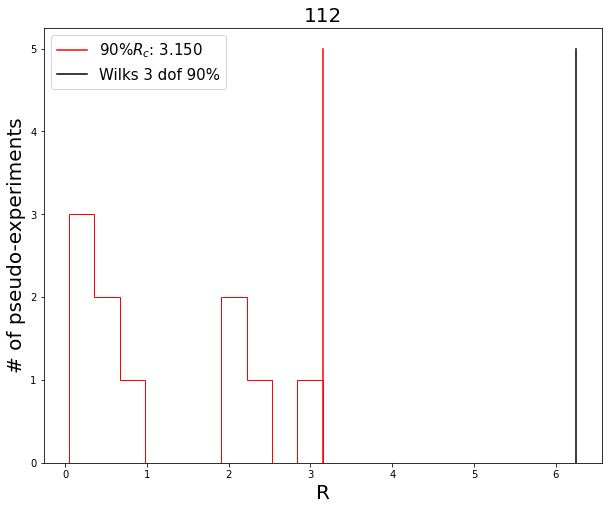

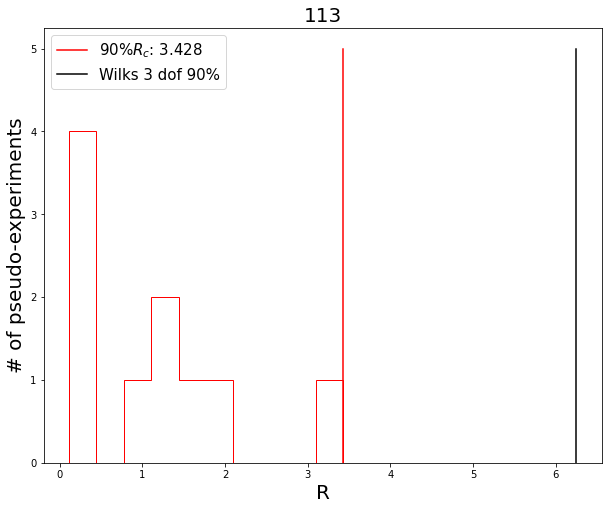

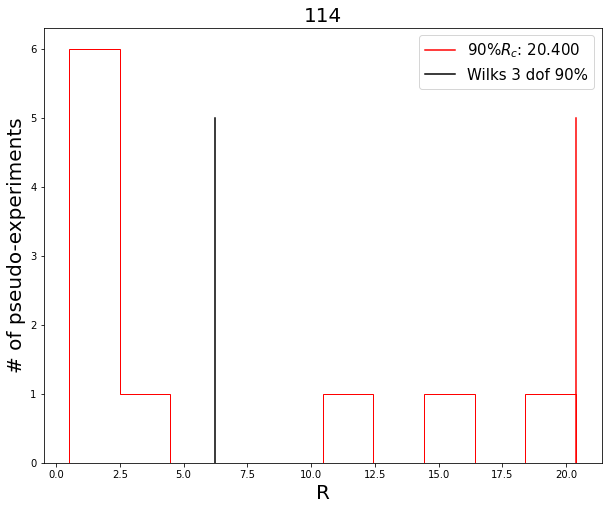

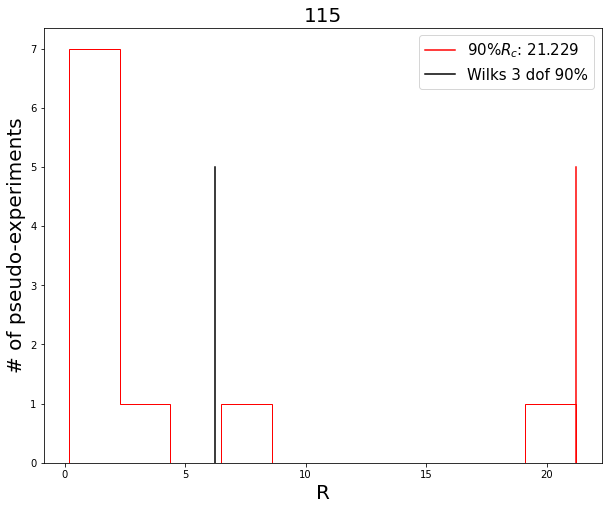

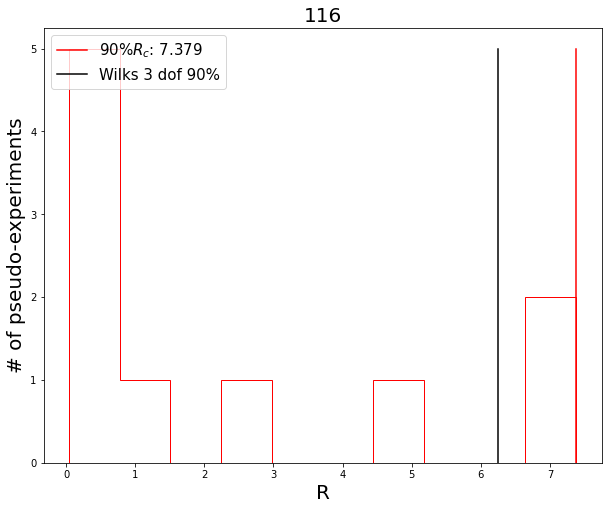

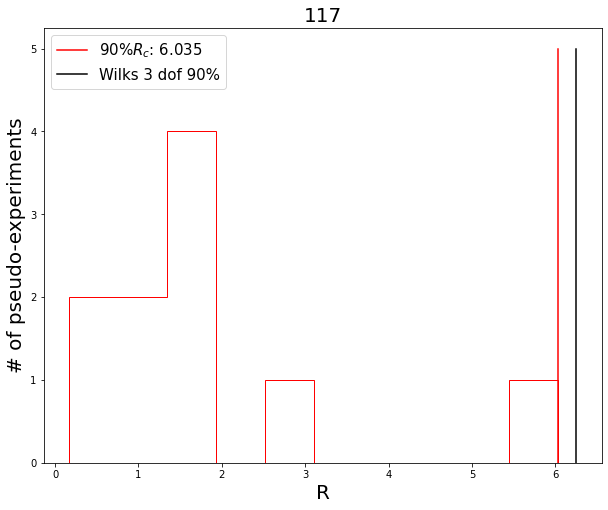

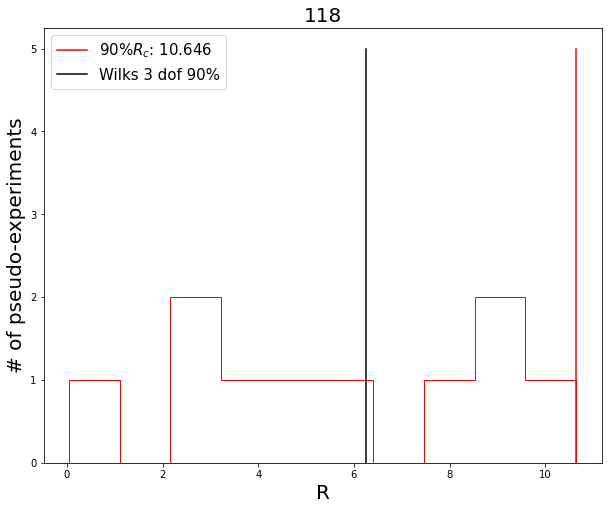

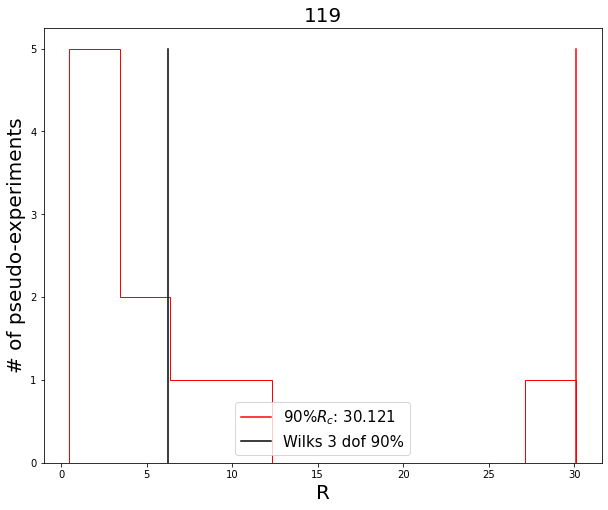

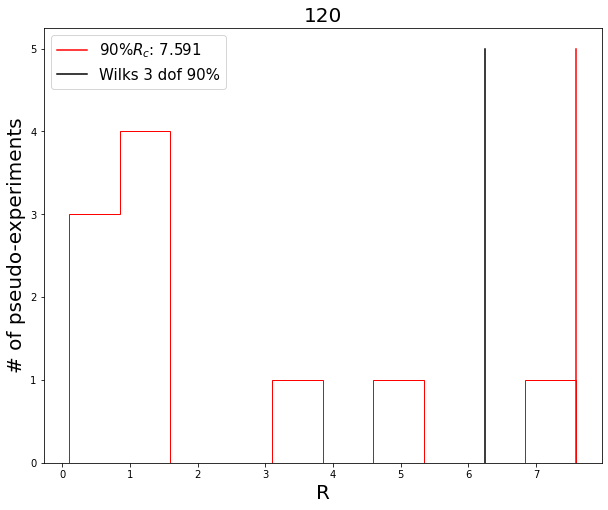

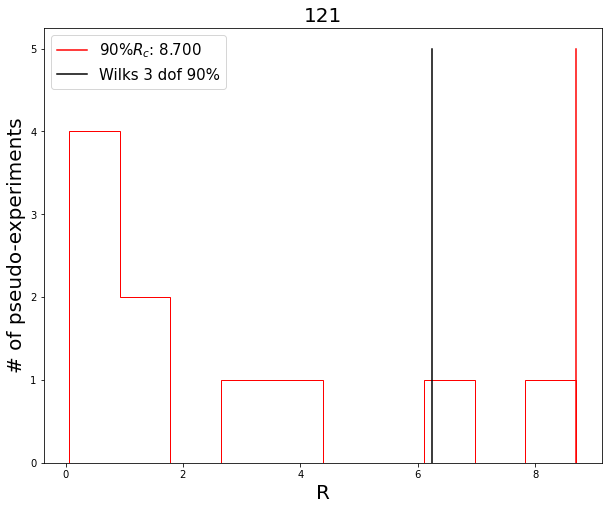

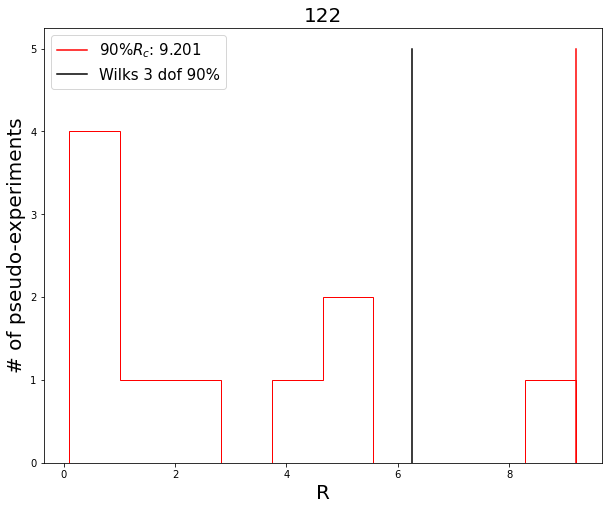

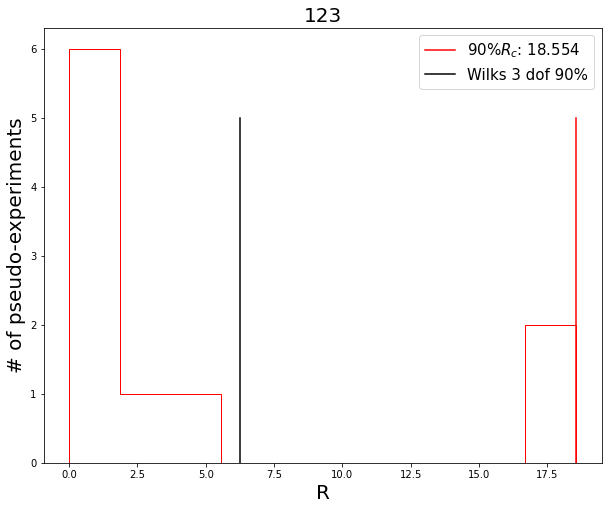

In [15]:
# look at each index individually and save the R_crit as we go 
R_list=[]

for i in RDict:
    R_uni=RDict[i]
    
    # sort list and find the 90% R_crit
    R_uni.sort()
    val_90th =R_uni[math.floor(num_uni*.9)]
    R_list.append(val_90th)
 
    # turn into histograms
    myrange=[0,20]
    fig,ax = plt.subplots(figsize=(10,8))
    plt.hist(R_uni,histtype='step',color='red')
    plt.plot([val_90th,val_90th],[0,5],color='red',label=r'$90\% R_c$: '+str("%.3f" %val_90th))
    # plot the wilk's theorem line for reference
    plt.plot([6.25,6.25],[0,5],color='black',label='Wilks 3 dof 90%')
    plt.xlabel(r"R",fontsize=20)
    plt.ylabel(r"# of pseudo-experiments",fontsize=20)
    plt.title(str(i),fontsize=20)
    plt.legend(fontsize=15)
    plt.show()
    plt.close()

Next we'll make 2d slices of R_crit

In [16]:
## change into 3d array of grid values
Rcrit_arr=np.zeros((5,5,5))

for pt in range(len(R_list)):
    #this is a mess, but works.
    m_id = math.floor(pt/((5*5)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*5*5)/(5))
    um4_id = pt % (5)
#     print(pt,m_id,ue4_id,um4_id)
    Rcrit_arr[ue4_id][m_id][um4_id]=R_list[pt]

In [17]:
# switch to bin centers for plotting
def getbincenters( fulllist):
    newlist =[]
    for i in range(len(fulllist)-1):
        topval = fulllist[i+1]
        botval = fulllist[i]
        center = (topval+botval)/float(2.0)
        newlist.append(center)
    return newlist

m41_center = getbincenters(m41_list)
ue4_center = getbincenters(ue4_list)
um4_center = getbincenters(um4_list)

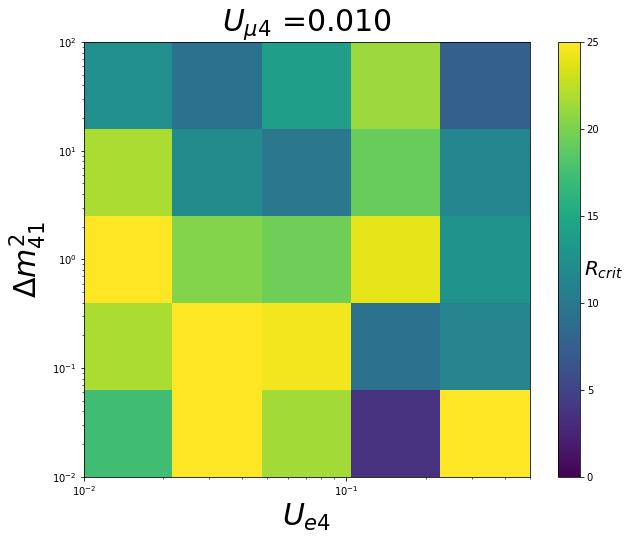

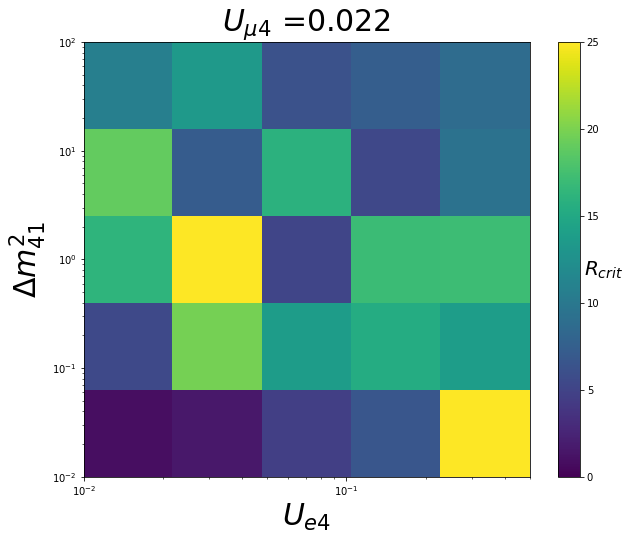

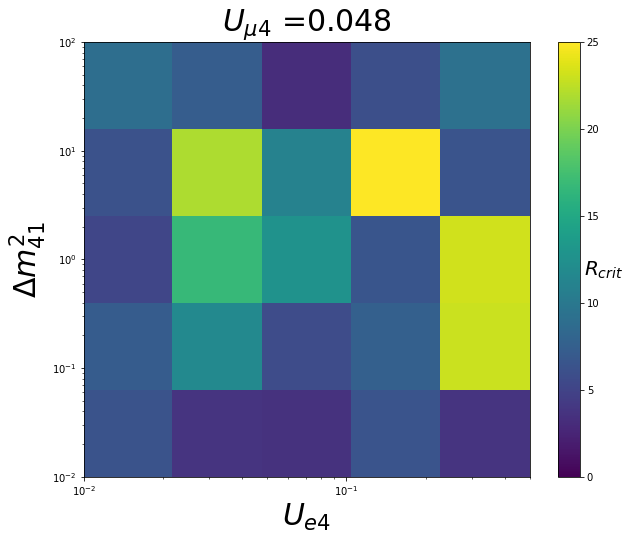

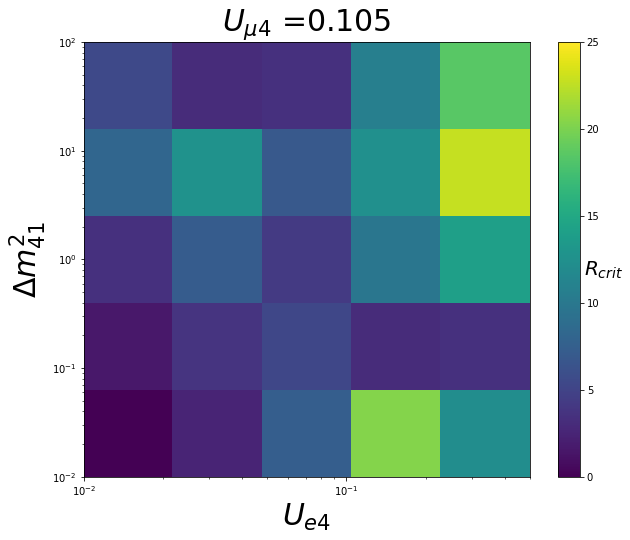

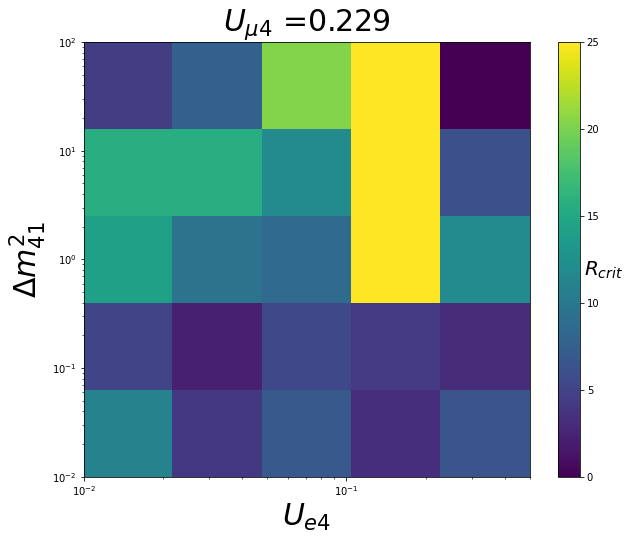

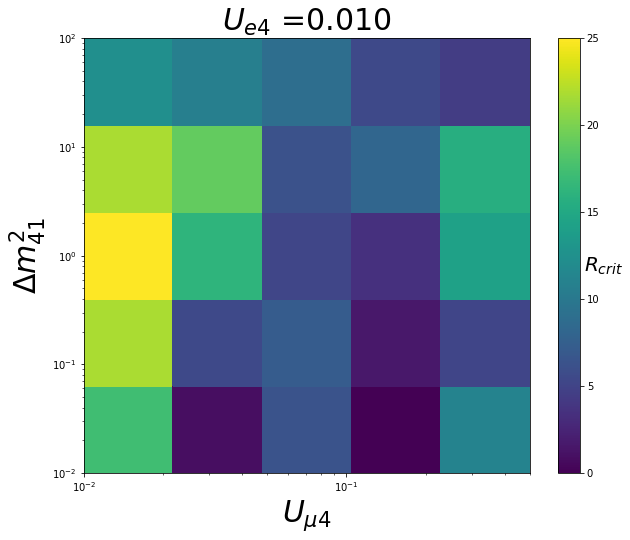

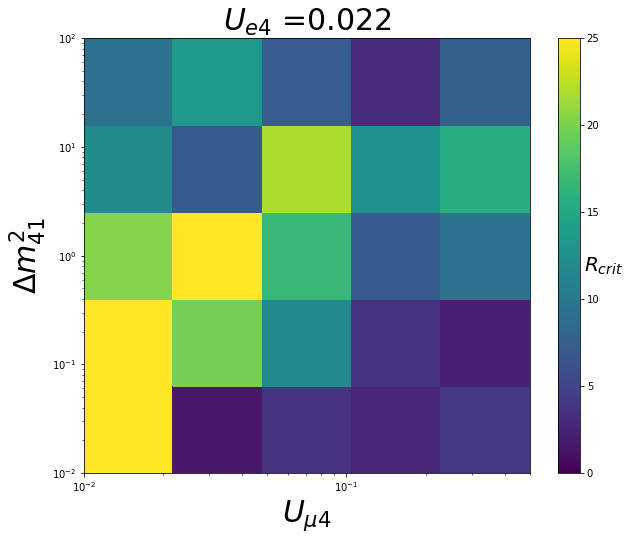

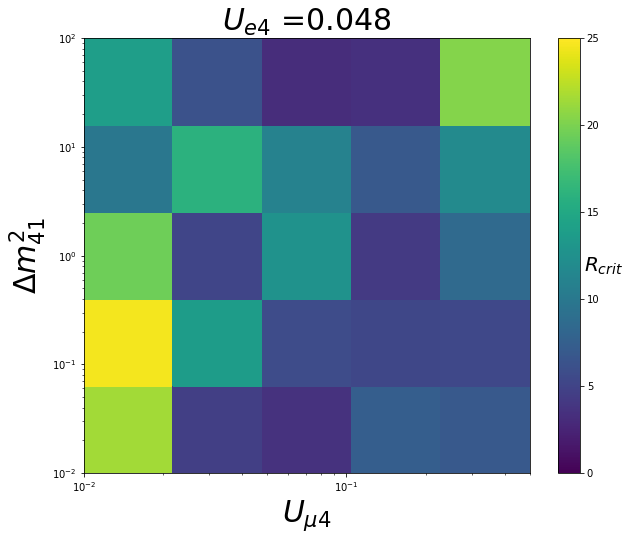

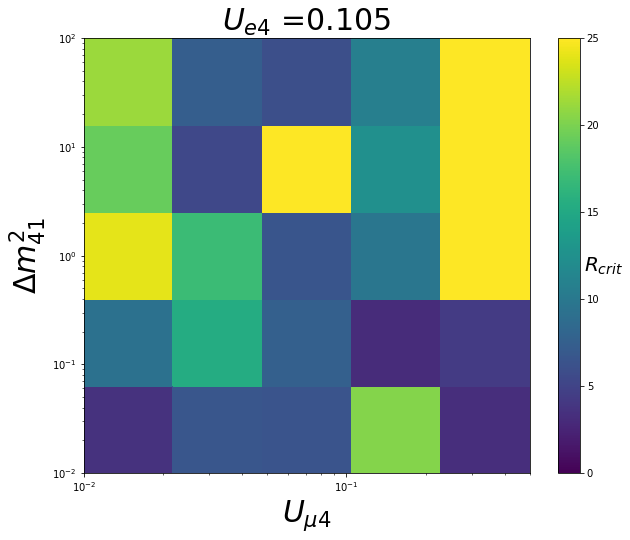

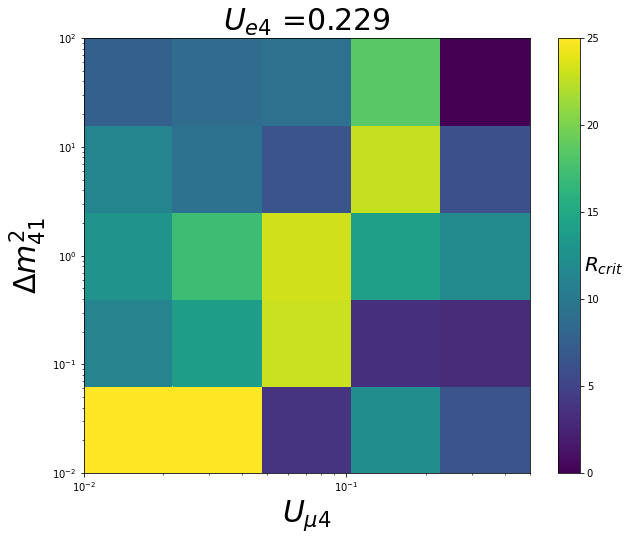

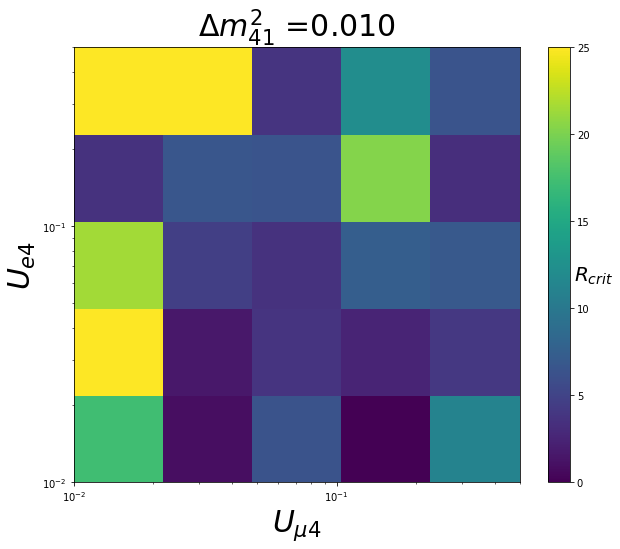

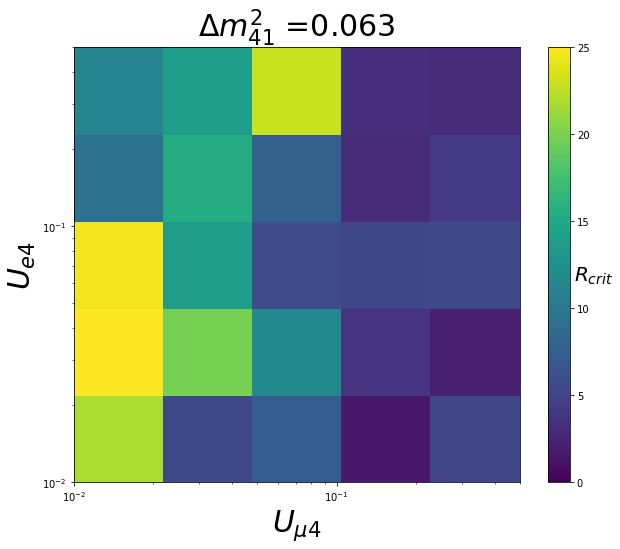

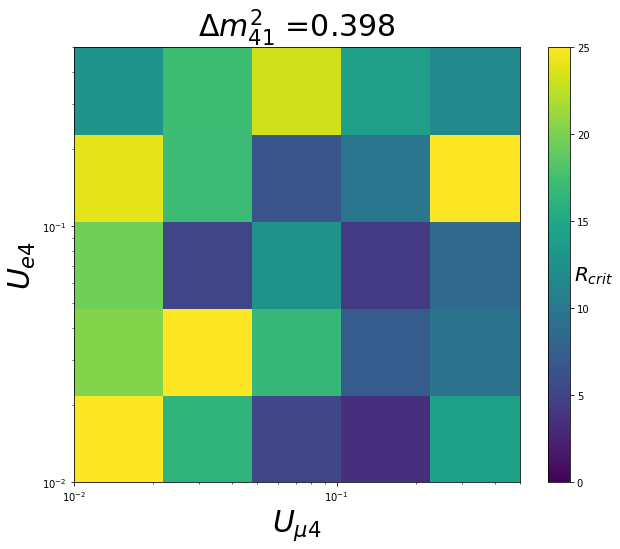

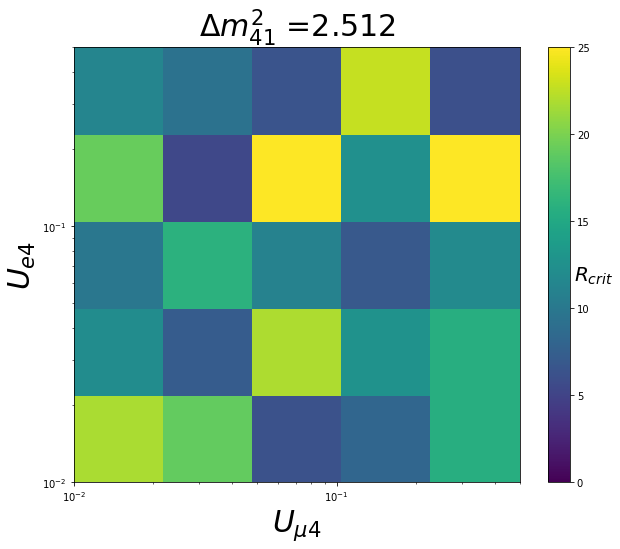

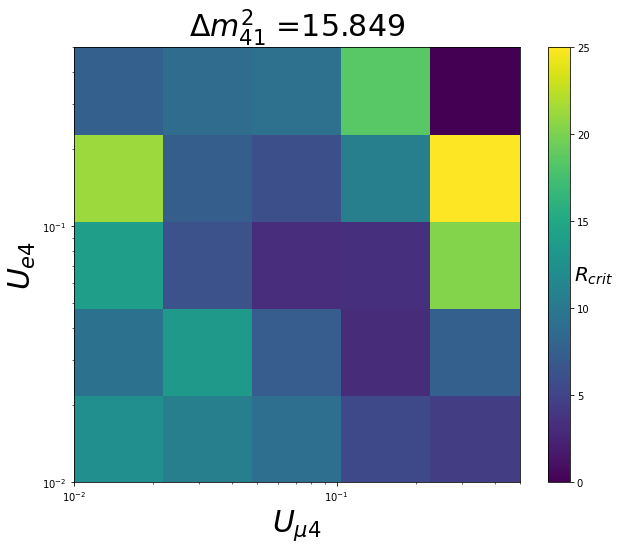

In [18]:
# make all the 3d slices of the Rcrit values
# norm=colors.Normalize(vmin=1e-13, vmax=20)
y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=25))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str("%.3f" %um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("Rcrit_umu4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=25))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str("%.3f" %ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("Rcrit_ue4_"+str(i)+".png")
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, Rcrit_arr[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=25))
    cbar = plt.colorbar()
    cbar.set_label(r'$R_{crit}$',rotation=0,fontsize=20)
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str("%.3f" %m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("Rcrit_m41_"+str(i)+".png")
    plt.show()
    plt.close()


Next we want the 2D slices of the sensitivity - without the contours first

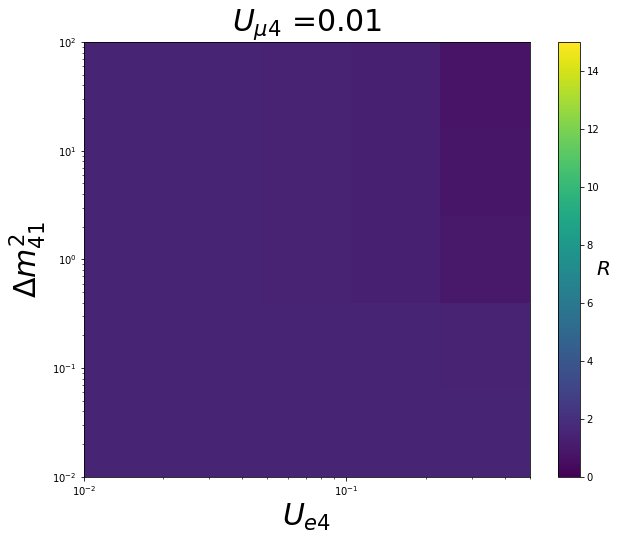

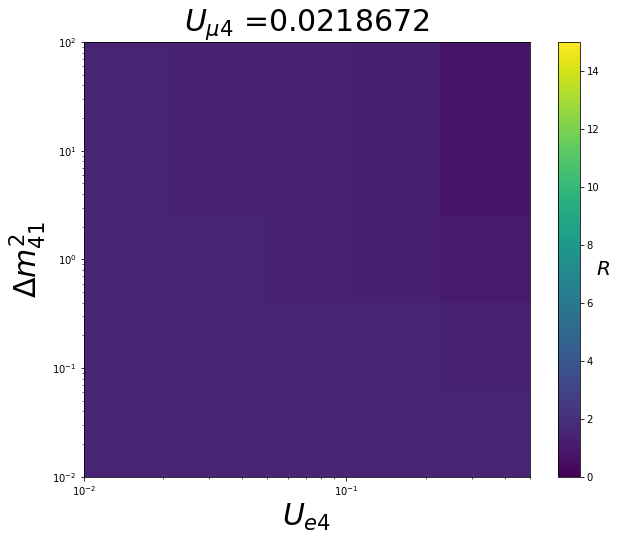

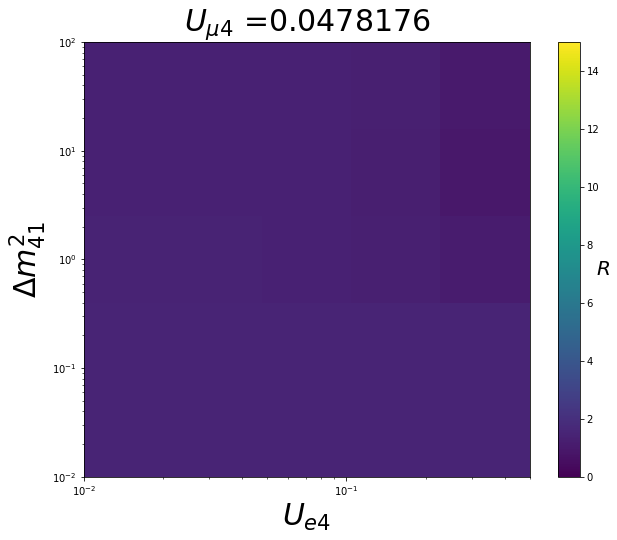

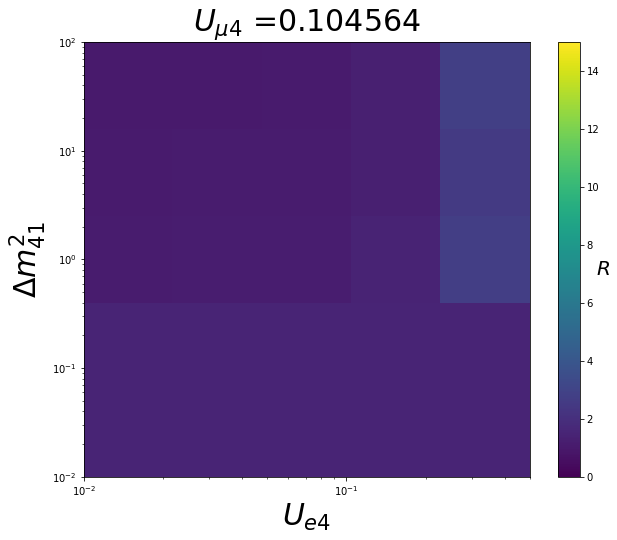

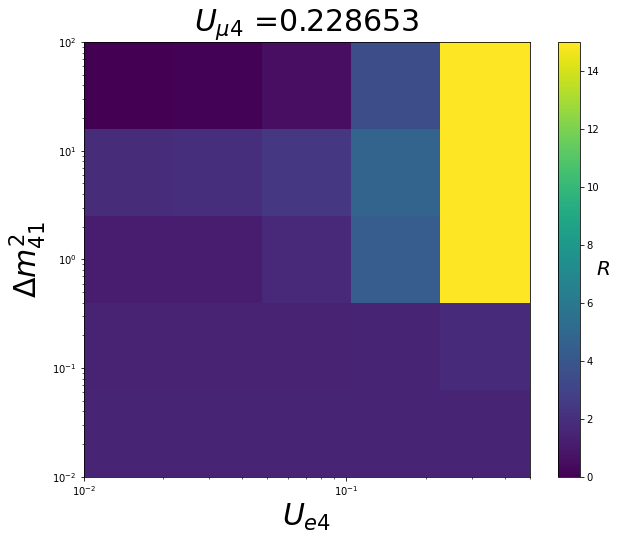

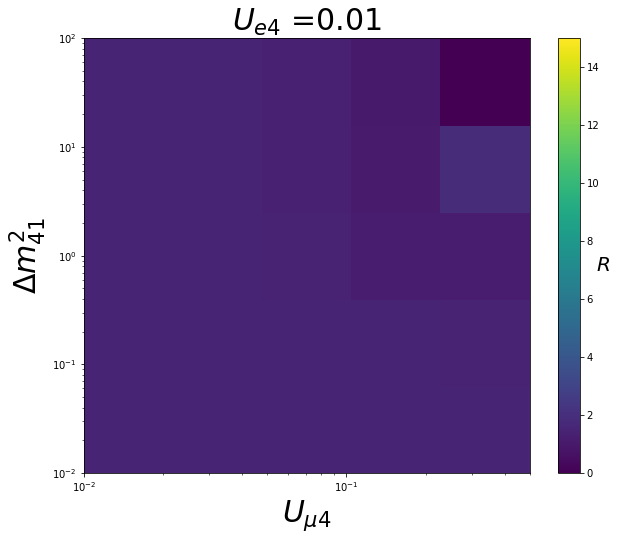

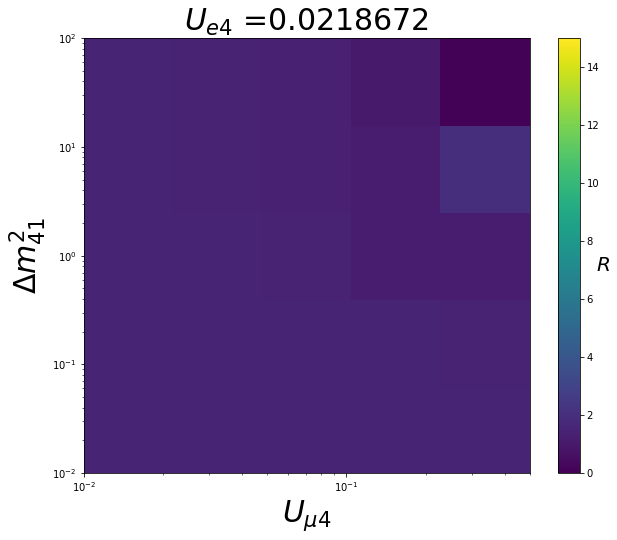

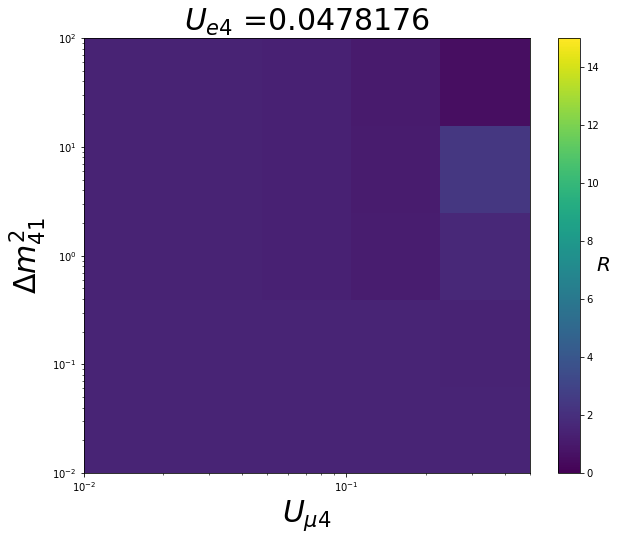

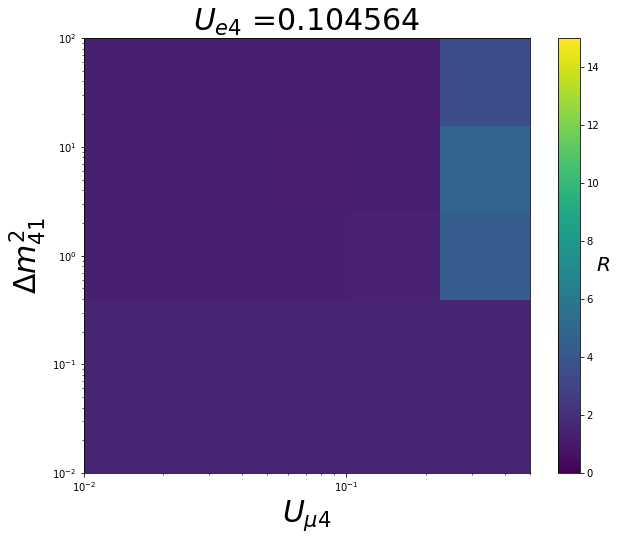

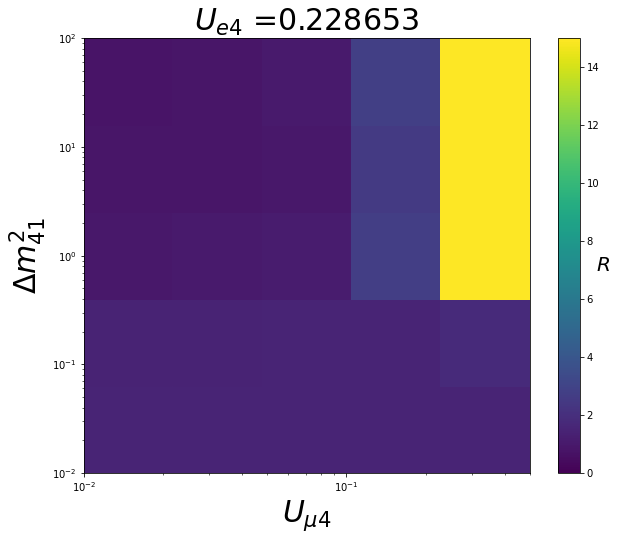

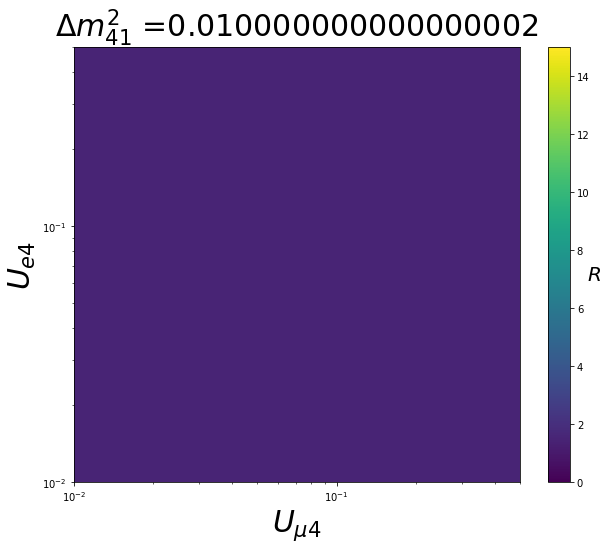

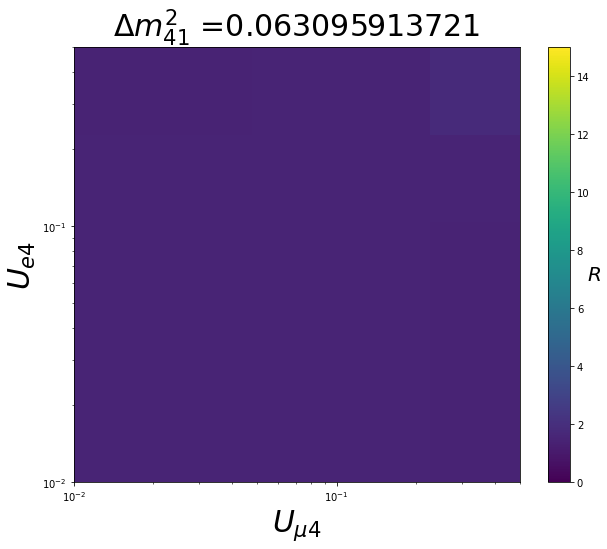

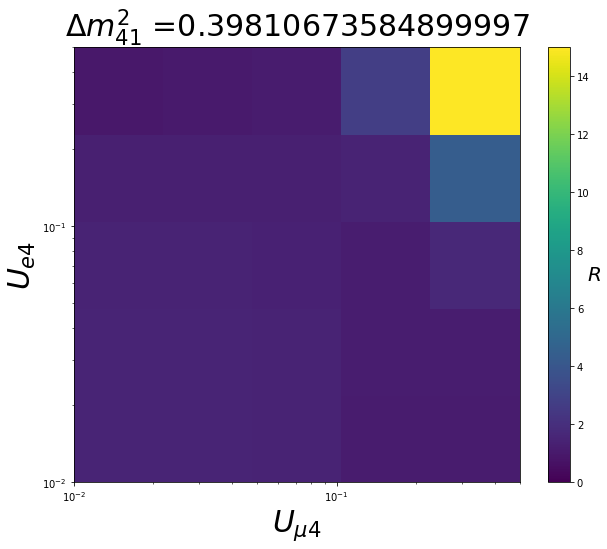

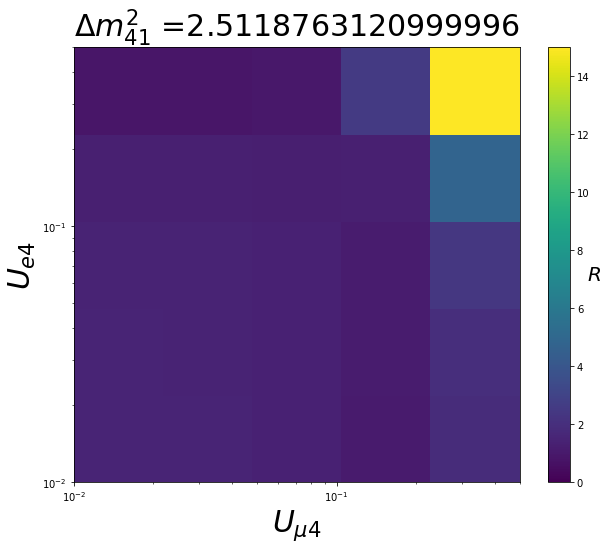

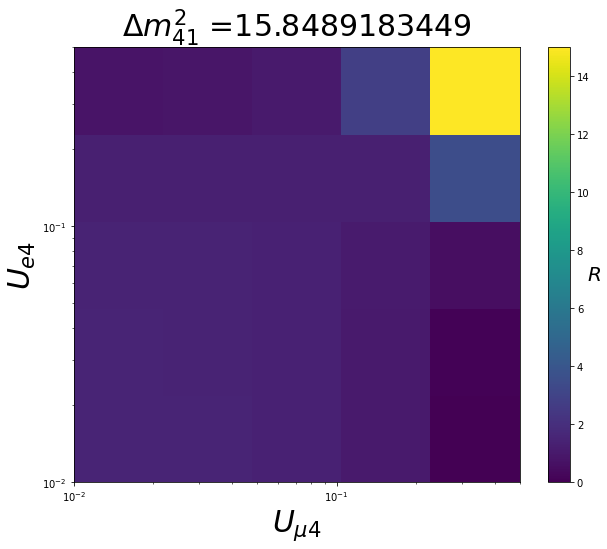

In [9]:
y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=15))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_um4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=15))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_ue4_"+str(i)+".png")
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=15))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_"+str(i)+".png")
    plt.show()
    plt.close()

Finally, lets see which grid points are allowed if the data==null oscillation

In [10]:
# compare R_sens to R_crit 
confidence_arr=np.copy(chi_arr_sens)
for i in range(5):
    for j in range(5):
        for k in range(5):
            delta=chi_arr_sens[i][j][k]
            if delta < Rcrit_arr[i][j][k]:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1             

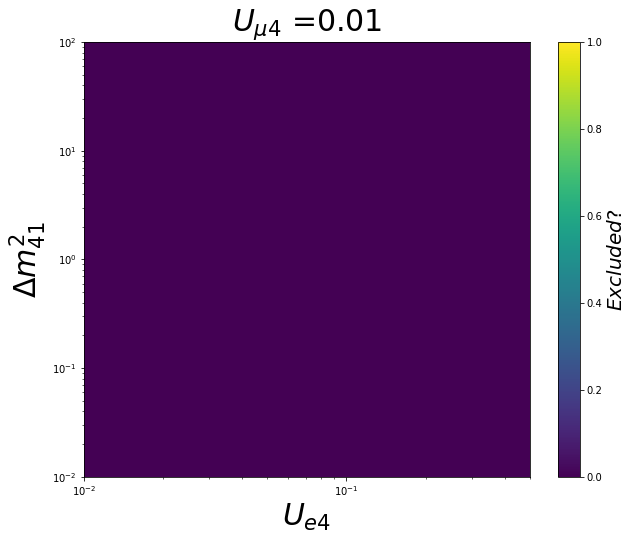

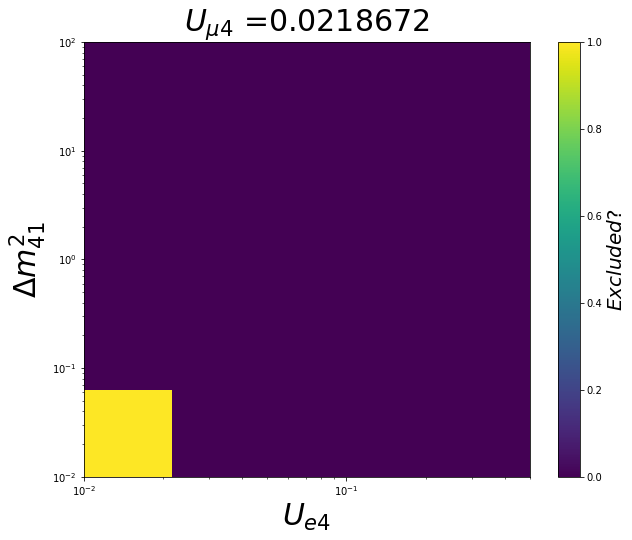

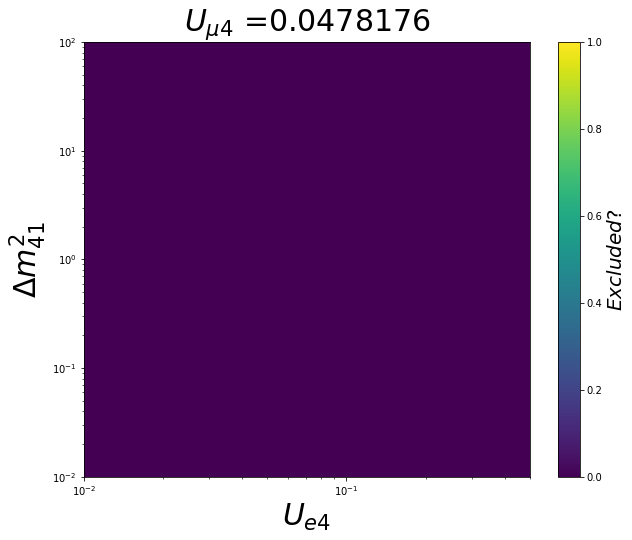

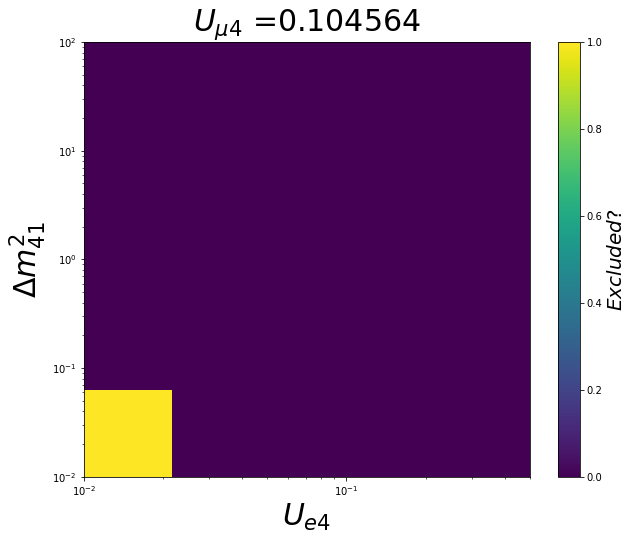

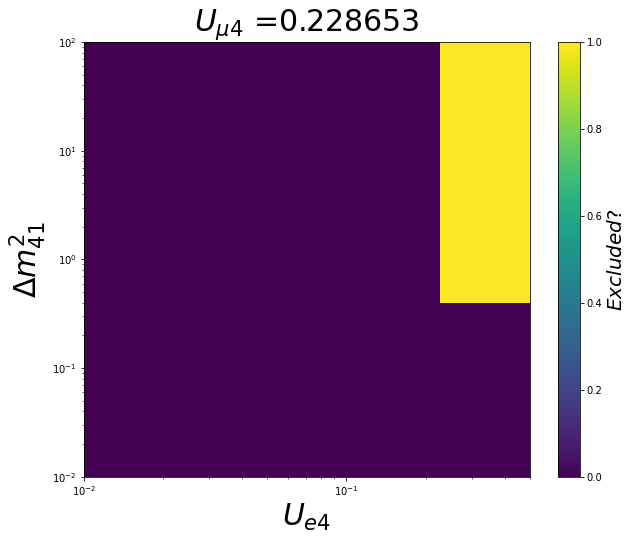

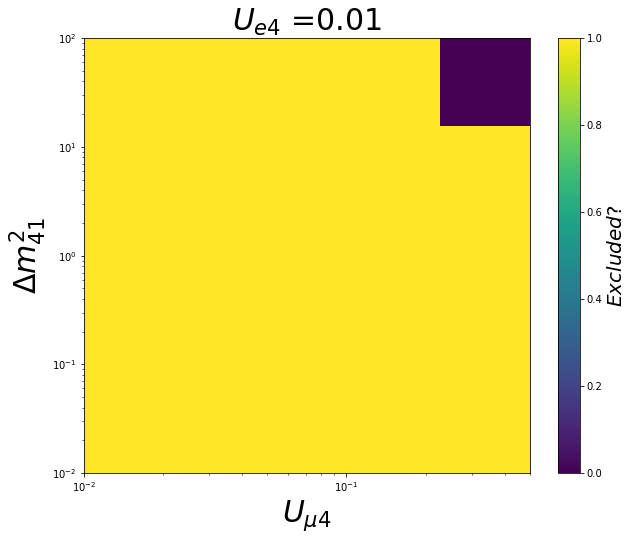

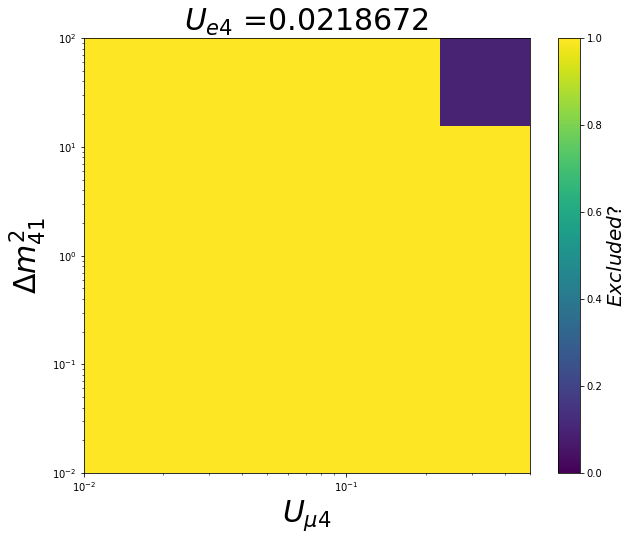

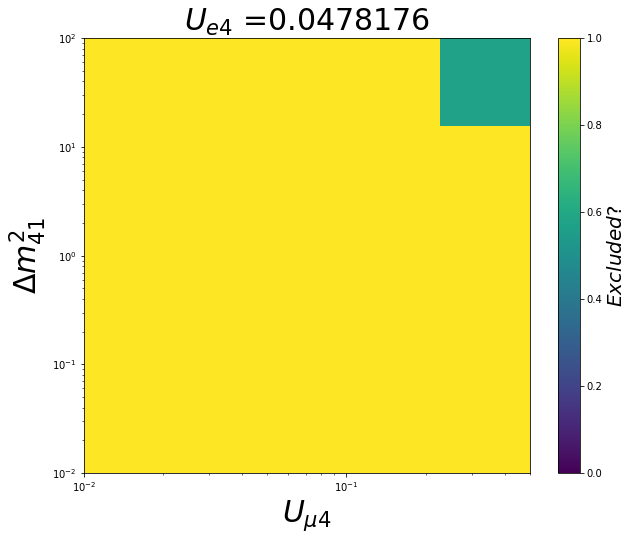

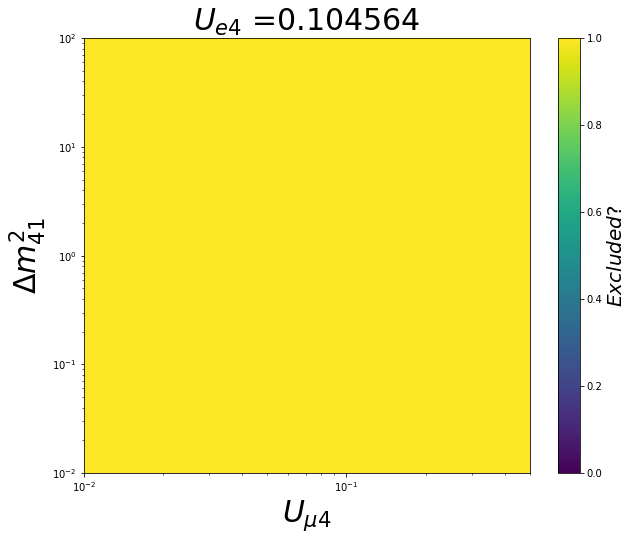

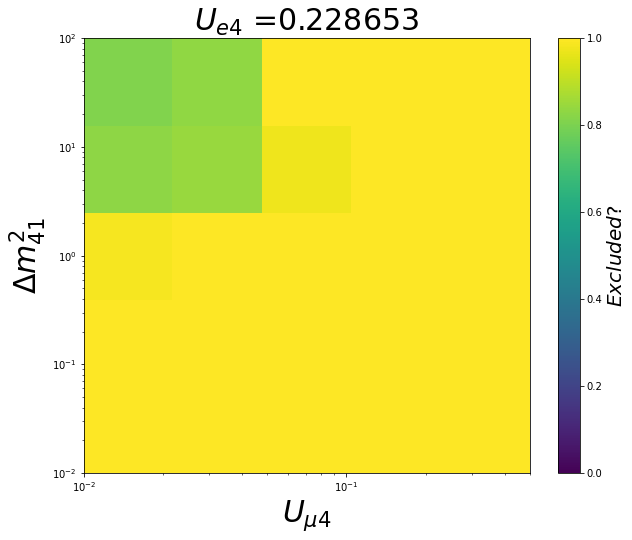

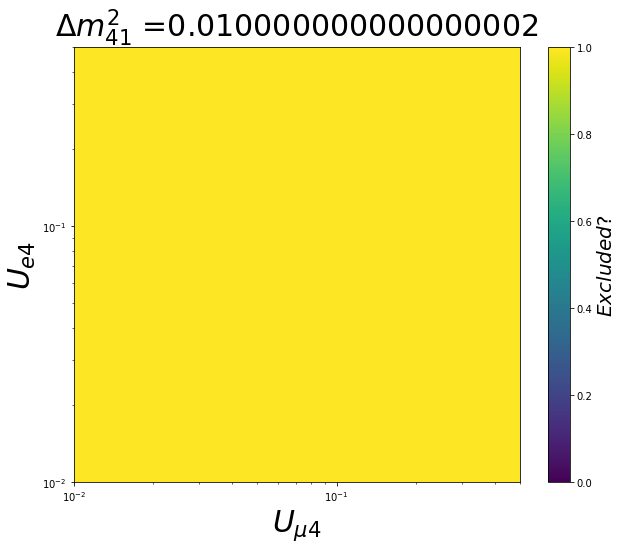

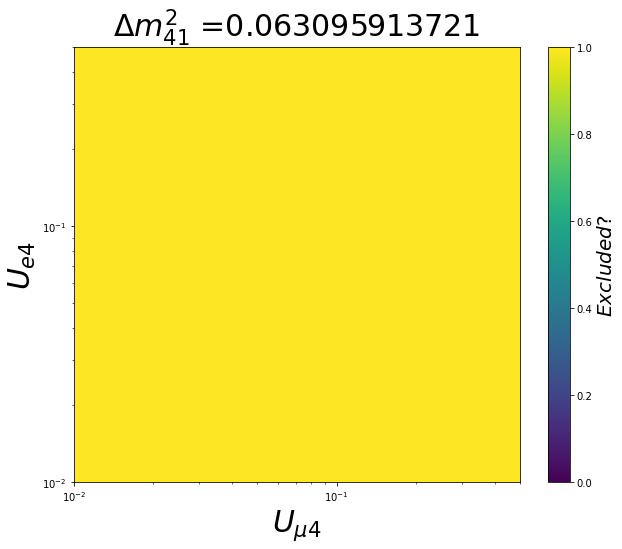

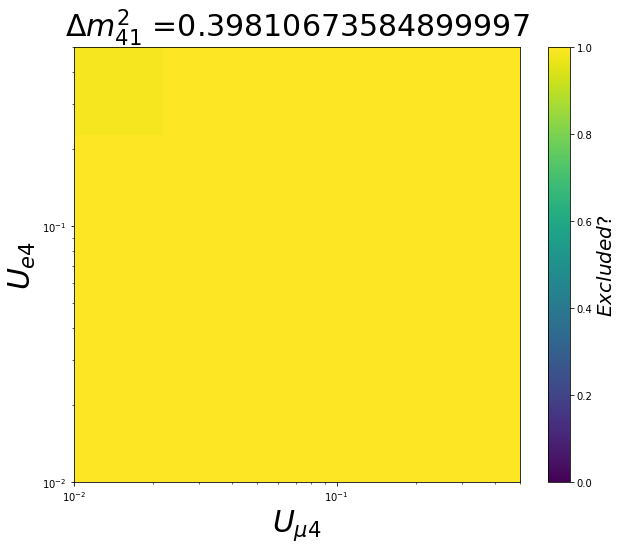

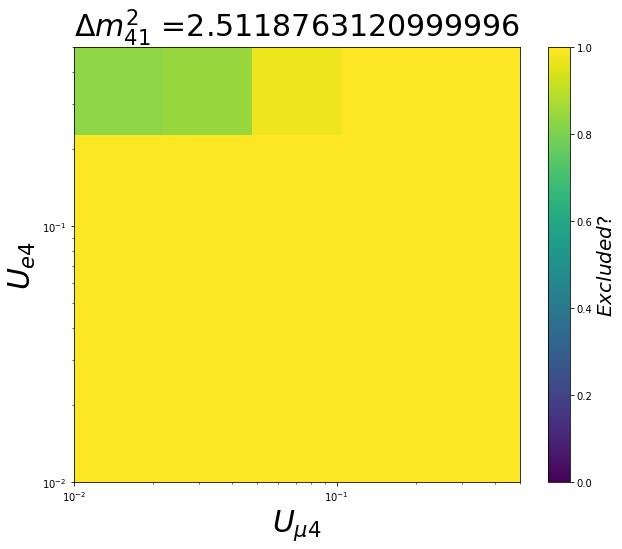

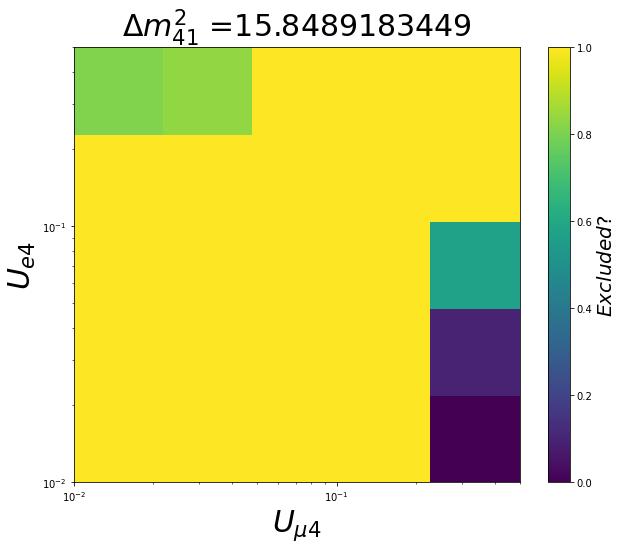

In [13]:
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, confidence_arr[:,:,i],norm=colors.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar()
    cbar.set_label(r'$Excluded?$',rotation=90,fontsize=20)
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_um4_"+str(i)+".png")
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, confidence_arr[i,:,:].transpose(),norm=colors.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar()
    cbar.set_label(r'$Excluded?$',rotation=90,fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_ue4_"+str(i)+".png")
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, confidence_arr[:,i,:],norm=colors.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar()
    cbar.set_label(r'$Excluded?$',rotation=90,fontsize=20)
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("FCsens_"+str(i)+".png")
    plt.show()
    plt.close()